<h1>🔍 Turkey Military Power Analysis vs Global Competitors</h1>
<p><b>🎯 Project Goal:</b> The goal of this project is to analyze the military capabilities of Turkey in comparison with regional powers such as Russia, Iran, Israel, Egypt, and Greece. The analysis aims to identify areas of strength and weakness across various military domains—including manpower, air, land, and naval—providing data-driven thoughts and recommendations to enhance Turkey’s defense preparedness and strategic positioning.</p>

<h2>📝 Important Notes</h2>
<h3>These are important notes to point out, please take them into consideration.<br>
    
- This project is intended solely for learning and practicing data science, and I do not intend to offend any country mentioned.

- All the information obtained by searching the internet, watching numerous YouTube videos, and taking information from ChatGPT and DeepSeek.

- This data is taken from Kaggle, and it is data from 2017. Therefore, these numbers and data are considered outdated and not currently accurate. However, as I mentioned, the goal of this project is to learn and practice data science.

Thank you for your understanding 🙏🏻.</h3>

<h2>📥 Phase 1: Load the Dataset</h2>
<p><b>🎯 Goal:</b> Import the important libraries and get the dataset.</p>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
!pip install plotly
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [5]:
world_df = pd.read_csv('GlobalFirePower.csv')
world_df

,Country,ISO3,Rank,Total Population,Manpower Available,Fit-for-Service,Reaching Military Age,Total Military Personnel,Active Personnel,Reserve Personnel,...,Railway Coverage (km),Serivecable Airports,Defense Budget,External Debt,Foreign Exchange / Gold,Purchasing Power Parity,Square Land Area (km),Coastline (km),Shared Borders (km),Waterways (km)
0,United States,USA,1,323995528,145215000,120025000,4220000,2363675,1373650,990025,...,224792,13513,587800,17910000,117600,18560000,9826675,19924,12048,41009
1,Russia,RUS,2,142355415,70000000,47000000,1355000,3371027,798527,2572500,...,87157,1218,44600,514800,365500,3745000,17098242,37653,22408,102000
2,China,CHN,3,1373541278,750000000,619000000,19550000,3712500,2260000,1452500,...,86000,507,161700,983500,3092000,21270000,9596961,14500,22457,110000
3,India,IND,4,1266883598,616000000,489600000,22900000,4207250,1362500,2844750,...,63974,346,51000,507000,359100,8721000,3287263,7000,13888,14500
4,France,FRA,5,66836154,30000000,23750000,775000,387635,204000,183635,...,29640,464,35000,5360000,138200,2737000,643801,4853,4072,8501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Central African Republic,CAR,129,5507257,2300000,1320000,110000,5825,5825,0,...,0,39,18,686,4128,3206,622984,Landlocked,5920,2800
129,Mauritania,MAU,130,3677293,1523335,1061515,72942,20870,15870,5000,...,728,30,39,3585000,1186,16710,1030700,754,5002,Minimum not met.
130,Sierra Leone,SIE,131,6018888,1402400,835830,32848,10750,10750,0,...,0,8,13,1561,2332,10640,71740,402,1093,800
131,Suriname,SUR,132,585824,131700,77100,3030,2270,2170,100,...,0,55,67,1439,393,8547,163820,386,1907,1200


<h2>🧹 Phase 2: Data Cleaning</h2>
<p><b>🎯 Goal:</b> Prepare the dataset for upcoming phases.</p>

In [7]:
world_df.columns

Index(['Country', 'ISO3', 'Rank', 'Total Population', 'Manpower Available',
       'Fit-for-Service', 'Reaching Military Age', 'Total Military Personnel',
       'Active Personnel', 'Reserve Personnel', 'Total Aircraft Strength',
       'Fighter Aircraft', 'Attack Aircraft', 'Transport Aircraft',
       'Trainer Aircraft', 'Total Helicopter Strength', 'Attack Helicopters',
       'Combat Tanks', 'Armored Fighting Vehicles', 'Self-Propelled Artillery',
       'Towed Artillery', 'Rocket Projectors', 'Total Naval Assets',
       'Aircraft Carriers', 'Frigates', 'Destroyers', 'Corvettes',
       'Submarines', 'Patrol Craft', 'Mine Warfare Vessels',
       'Production (bbl/dy)', 'Consumption (bbl/dy)', 'Proven Reserves (bbl)',
       'Labor Force', 'Merchant Marine Strength', 'Major Ports / Terminals',
       'Roadway Coverage (km)', 'Railway Coverage (km)',
       'Serivecable Airports', 'Defense Budget', 'External Debt',
       'Foreign Exchange / Gold', 'Purchasing Power Parity',
       

In [8]:
columns_to_drop = [
    'ISO3', 'Production (bbl/dy)', 'Consumption (bbl/dy)', 'Proven Reserves (bbl)',
    'Labor Force', 'Merchant Marine Strength', 'Major Ports / Terminals',
    'Roadway Coverage (km)', 'Railway Coverage (km)', 'Serivecable Airports',
    'External Debt', 'Foreign Exchange / Gold', 'Purchasing Power Parity',
    'Coastline (km)', 'Shared Borders (km)', 'Waterways (km)'
]
world_df.drop(columns=columns_to_drop,inplace=True,axis=1)

In [9]:
world_df

,Country,Rank,Total Population,Manpower Available,Fit-for-Service,Reaching Military Age,Total Military Personnel,Active Personnel,Reserve Personnel,Total Aircraft Strength,...,Total Naval Assets,Aircraft Carriers,Frigates,Destroyers,Corvettes,Submarines,Patrol Craft,Mine Warfare Vessels,Defense Budget,Square Land Area (km)
0,United States,1,323995528,145215000,120025000,4220000,2363675,1373650,990025,13762,...,415,19,8,63,0,70,13,11,587800,9826675
1,Russia,2,142355415,70000000,47000000,1355000,3371027,798527,2572500,3794,...,352,1,6,15,81,63,28,46,44600,17098242
2,China,3,1373541278,750000000,619000000,19550000,3712500,2260000,1452500,2955,...,714,1,51,35,35,68,220,31,161700,9596961
3,India,4,1266883598,616000000,489600000,22900000,4207250,1362500,2844750,2102,...,295,3,14,11,23,15,139,6,51000,3287263
4,France,5,66836154,30000000,23750000,775000,387635,204000,183635,1305,...,118,4,11,4,0,10,17,18,35000,643801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Central African Republic,129,5507257,2300000,1320000,110000,5825,5825,0,4,...,0,0,0,0,0,0,0,0,18,622984
129,Mauritania,130,3677293,1523335,1061515,72942,20870,15870,5000,26,...,5,0,0,0,0,0,5,0,39,1030700
130,Sierra Leone,131,6018888,1402400,835830,32848,10750,10750,0,5,...,10,0,0,0,0,0,10,0,13,71740
131,Suriname,132,585824,131700,77100,3030,2270,2170,100,3,...,3,0,0,0,0,0,3,0,67,163820


In [10]:
world_df.rename(columns={'Rank':'Rank (Global)'},inplace=True)

In [11]:
world_df.columns

Index(['Country', 'Rank (Global)', 'Total Population', 'Manpower Available',
       'Fit-for-Service', 'Reaching Military Age', 'Total Military Personnel',
       'Active Personnel', 'Reserve Personnel', 'Total Aircraft Strength',
       'Fighter Aircraft', 'Attack Aircraft', 'Transport Aircraft',
       'Trainer Aircraft', 'Total Helicopter Strength', 'Attack Helicopters',
       'Combat Tanks', 'Armored Fighting Vehicles', 'Self-Propelled Artillery',
       'Towed Artillery', 'Rocket Projectors', 'Total Naval Assets',
       'Aircraft Carriers', 'Frigates', 'Destroyers', 'Corvettes',
       'Submarines', 'Patrol Craft', 'Mine Warfare Vessels', 'Defense Budget',
       'Square Land Area (km)'],
      dtype='object')

In [12]:
world_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Country                    133 non-null    object
 1   Rank (Global)              133 non-null    int64 
 2   Total Population           133 non-null    int64 
 3   Manpower Available         133 non-null    int64 
 4   Fit-for-Service            133 non-null    int64 
 5   Reaching Military Age      133 non-null    int64 
 6   Total Military Personnel   133 non-null    int64 
 7   Active Personnel           133 non-null    int64 
 8   Reserve Personnel          133 non-null    int64 
 9   Total Aircraft Strength    133 non-null    int64 
 10  Fighter Aircraft           133 non-null    int64 
 11  Attack Aircraft            133 non-null    int64 
 12  Transport Aircraft         133 non-null    int64 
 13  Trainer Aircraft           133 non-null    int64 
 14  Total Heli

In [13]:
world_df.isna().sum()

Country                      0
Rank (Global)                0
Total Population             0
Manpower Available           0
Fit-for-Service              0
Reaching Military Age        0
Total Military Personnel     0
Active Personnel             0
Reserve Personnel            0
Total Aircraft Strength      0
Fighter Aircraft             0
Attack Aircraft              0
Transport Aircraft           0
Trainer Aircraft             0
Total Helicopter Strength    0
Attack Helicopters           0
Combat Tanks                 0
Armored Fighting Vehicles    0
Self-Propelled Artillery     0
Towed Artillery              0
Rocket Projectors            0
Total Naval Assets           0
Aircraft Carriers            0
Frigates                     0
Destroyers                   0
Corvettes                    0
Submarines                   0
Patrol Craft                 0
Mine Warfare Vessels         0
Defense Budget               0
Square Land Area (km)        0
dtype: int64

<h2>📊 Phase 3: Exploratory Data Analysis (EDA)</h2>
<p><b>🎯 Goal:</b> Understand and visualize the military profile of Turkey and the global context and identify areas of strength and weakness.</p>

<h3>First. Lets start with Turkey data</h3>

In [16]:
turkey_data = world_df[world_df['Country'] == 'Turkey']
turkey_data

,Country,Rank (Global),Total Population,Manpower Available,Fit-for-Service,Reaching Military Age,Total Military Personnel,Active Personnel,Reserve Personnel,Total Aircraft Strength,...,Total Naval Assets,Aircraft Carriers,Frigates,Destroyers,Corvettes,Submarines,Patrol Craft,Mine Warfare Vessels,Defense Budget,Square Land Area (km)
7,Turkey,8,80274604,41640000,35010000,1375000,743415,382850,360565,1018,...,194,1,16,0,9,12,34,11,8208,783562


<h3>Now. Lets identify who are the regional threats.
According to historical tensions, geopolitical rivalries, and military balance in the surrounding region. Here are the main regional threats or rivals often discussed:</h3>
<h3>Russia, Greece, Iran, Egypt and Israel.</h3>

In [18]:
russia_data = world_df[world_df['Country'] == 'Russia']
russia_data

,Country,Rank (Global),Total Population,Manpower Available,Fit-for-Service,Reaching Military Age,Total Military Personnel,Active Personnel,Reserve Personnel,Total Aircraft Strength,...,Total Naval Assets,Aircraft Carriers,Frigates,Destroyers,Corvettes,Submarines,Patrol Craft,Mine Warfare Vessels,Defense Budget,Square Land Area (km)
1,Russia,2,142355415,70000000,47000000,1355000,3371027,798527,2572500,3794,...,352,1,6,15,81,63,28,46,44600,17098242


In [19]:
greece_data = world_df[world_df['Country'] == 'Greece']
greece_data

,Country,Rank (Global),Total Population,Manpower Available,Fit-for-Service,Reaching Military Age,Total Military Personnel,Active Personnel,Reserve Personnel,Total Aircraft Strength,...,Total Naval Assets,Aircraft Carriers,Frigates,Destroyers,Corvettes,Submarines,Patrol Craft,Mine Warfare Vessels,Defense Budget,Square Land Area (km)
27,Greece,28,10773253,5000000,4050000,105000,413750,161500,252250,600,...,115,0,13,0,0,11,25,4,6540,131957


In [20]:
iran_data = world_df[world_df['Country'] == 'Iran']
iran_data

,Country,Rank (Global),Total Population,Manpower Available,Fit-for-Service,Reaching Military Age,Total Military Personnel,Active Personnel,Reserve Personnel,Total Aircraft Strength,...,Total Naval Assets,Aircraft Carriers,Frigates,Destroyers,Corvettes,Submarines,Patrol Craft,Mine Warfare Vessels,Defense Budget,Square Land Area (km)
20,Iran,21,82801633,47000000,39570000,1400000,934000,534000,400000,477,...,398,0,5,0,3,33,230,10,6300,1648195


In [21]:
israel_data = world_df[world_df['Country'] == 'Israel']
israel_data

,Country,Rank (Global),Total Population,Manpower Available,Fit-for-Service,Reaching Military Age,Total Military Personnel,Active Personnel,Reserve Personnel,Total Aircraft Strength,...,Total Naval Assets,Aircraft Carriers,Frigates,Destroyers,Corvettes,Submarines,Patrol Craft,Mine Warfare Vessels,Defense Budget,Square Land Area (km)
14,Israel,15,8174527,3600000,3000000,122000,718250,168250,550000,652,...,65,0,0,0,3,6,32,0,15500,20770


In [22]:
egypt_data = world_df[world_df['Country'] == 'Egypt']
egypt_data

,Country,Rank (Global),Total Population,Manpower Available,Fit-for-Service,Reaching Military Age,Total Military Personnel,Active Personnel,Reserve Personnel,Total Aircraft Strength,...,Total Naval Assets,Aircraft Carriers,Frigates,Destroyers,Corvettes,Submarines,Patrol Craft,Mine Warfare Vessels,Defense Budget,Square Land Area (km)
9,Egypt,10,94666993,42000000,35306000,1535000,1329250,454250,875000,1132,...,319,0,9,0,2,5,227,23,4400,1001450


In [23]:
countries_list = ['Turkey', 'Russia','Greece','Iran','Israel','Egypt']
countries_df = world_df.loc[world_df['Country'].isin(countries_list)]
countries_df

,Country,Rank (Global),Total Population,Manpower Available,Fit-for-Service,Reaching Military Age,Total Military Personnel,Active Personnel,Reserve Personnel,Total Aircraft Strength,...,Total Naval Assets,Aircraft Carriers,Frigates,Destroyers,Corvettes,Submarines,Patrol Craft,Mine Warfare Vessels,Defense Budget,Square Land Area (km)
1,Russia,2,142355415,70000000,47000000,1355000,3371027,798527,2572500,3794,...,352,1,6,15,81,63,28,46,44600,17098242
7,Turkey,8,80274604,41640000,35010000,1375000,743415,382850,360565,1018,...,194,1,16,0,9,12,34,11,8208,783562
9,Egypt,10,94666993,42000000,35306000,1535000,1329250,454250,875000,1132,...,319,0,9,0,2,5,227,23,4400,1001450
14,Israel,15,8174527,3600000,3000000,122000,718250,168250,550000,652,...,65,0,0,0,3,6,32,0,15500,20770
20,Iran,21,82801633,47000000,39570000,1400000,934000,534000,400000,477,...,398,0,5,0,3,33,230,10,6300,1648195
27,Greece,28,10773253,5000000,4050000,105000,413750,161500,252250,600,...,115,0,13,0,0,11,25,4,6540,131957


<h3>After identifying the countries that we are going to work with, lets split the phase into chapters, each chapter is going to include a military aspcet. The chapters are:</h3>
<h3>Chapter 1: Manpower 🪖</h3>
<h3>Chapter 2: Landforce 🚛</h3>
<h3>Chapter 3: Navalforce 🚢</h3>
<h3>Chapter 4: Airforce 🚀</h3>
<h3>Chapter 5: Final Scores 🌟</h3>

<h2>Chapter 1: Manpower 🪖</h2>

In [26]:
manpower_df = countries_df[['Country', 'Rank (Global)' , 'Total Population', 'Manpower Available',
                            'Fit-for-Service', 'Reaching Military Age', 'Total Military Personnel',
                            'Active Personnel', 'Reserve Personnel']]
manpower_df

,Country,Rank (Global),Total Population,Manpower Available,Fit-for-Service,Reaching Military Age,Total Military Personnel,Active Personnel,Reserve Personnel
1,Russia,2,142355415,70000000,47000000,1355000,3371027,798527,2572500
7,Turkey,8,80274604,41640000,35010000,1375000,743415,382850,360565
9,Egypt,10,94666993,42000000,35306000,1535000,1329250,454250,875000
14,Israel,15,8174527,3600000,3000000,122000,718250,168250,550000
20,Iran,21,82801633,47000000,39570000,1400000,934000,534000,400000
27,Greece,28,10773253,5000000,4050000,105000,413750,161500,252250


<h2>First. Lets analyze Military Fitness Ratios across regional powers.</h2>
<h3>This analysis compares the proportion of military-eligible (Fit-for-Service) personnel relative to total available manpower across key regional powers. It is also to check which countries can mobilize a larger proportion of forces quickly.</h3>

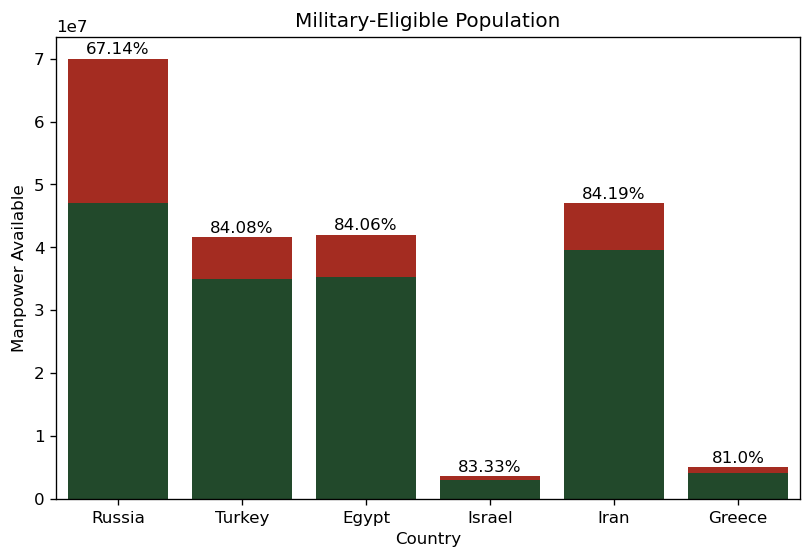

In [28]:
mp_ffs_percentages = [(47000000/70000000)*100,(35010000/41640000)*100,(35306000/42000000)*100,
                      (3000000/3600000)*100,(39570000/47000000)*100,(4050000/5000000)*100]
manpower_available = manpower_df['Manpower Available'].to_list()
x=0

plt.figure(figsize=(8,5),dpi=120)
plt.title('Military-Eligible Population')
sns.barplot(data=manpower_df,x='Country',y='Manpower Available',color='#ba1a0b')
sns.barplot(data=manpower_df,x='Country',y='Fit-for-Service',color='#1c4f28')

for i,v in enumerate(mp_ffs_percentages):
    plt.text(i,manpower_available[x]+750000,f'{round(v,2)}%',ha='center')
    x+=1
    
plt.show()

<h2>Analysis:</h2>
<h3></h3>
<h3><b>Russia</b></h3>
<h3>Although Russia possesses the highest number of manpower available and fit-for-service personnel, it records the lowest fitness ratio among the countries analyzed.</h3>
<h3>This suggests potential challenges related to the health, readiness, or demographic composition of its military-eligible population. Whether due to medical, physical, or systemic factors, Russia may face difficulties in rapid mobilization and cannot reliably depend on swift force deployment in the event of sudden conflict.</h3>
<h3></h3>
<h3><b>Turkey / Egypt / Iran</b></h3>
<h3>These countries have strong and balanced military manpower structure, with over 84% of available manpower being fit.</h3>
<h3>This high fitness ratio indicates elevated military readiness, enabling them to mobilize large and effective forces rapidly in the event of unexpected conflicts or emerging threats. This indicates how effectively these countries invest in the well-being and preparedness of their population — whether through awareness programs, education, healthy lifestyles, or structured military training.</h3>
<h3></h3>
<h3><b>Isreal / Greece</b></h3>
<h3>Despite having relatively low manpower availability, both Israel and Greece demonstrate exceptionally high fitness ratios.</h3>
<h3>This reflects a military posture that prioritizes quality over quantity, with a large share of their forces ready for rapid deployment — suggesting a strategic focus on efficiency, training, and readiness for sudden conflict scenarios.</h3>

<h2>Secondly. Lets analyze the Distribution of Total Military Personnel across key countries</h2>
<h3>In this step, we will compare the Total Military Personnel across countries using a heatmap to identify which nations maintain the largest military forces and which have relatively lower personnel levels.</h3>

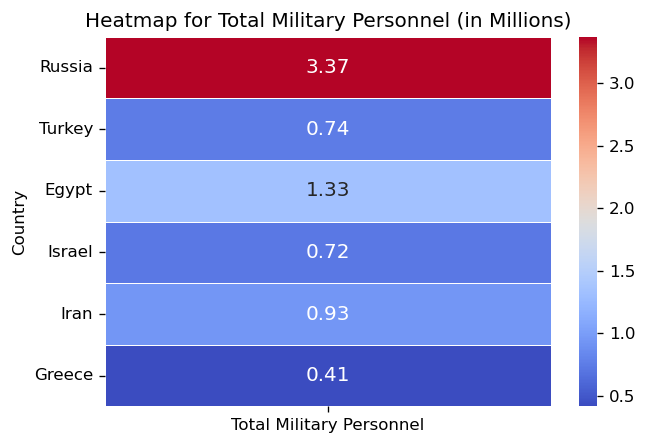

In [31]:
plt.figure(figsize=(6, 4),dpi=120)
data = countries_df.copy()
data['Total Military Personnel'] = data['Total Military Personnel'] / 1e6

sns.heatmap(
    data=data.set_index('Country')[['Total Military Personnel']],
    lw=0.5,
    annot=True,
    cmap='coolwarm',
    annot_kws={"size": 12},
    fmt=".2f"  
)

plt.title('Heatmap for Total Military Personnel (in Millions)')
plt.yticks(rotation=0)
plt.show()

<h2>Analysis:</h2>
<h3></h3>
<h3>From this heatmap, we can observe that Russia has the highest number of total military personnel among the listed countries. While Egypt ranks second, there remains a significant gap in troop numbers between Russia and others, highlighting Russia’s substantial manpower advantage.</h3>

<h3>On the other hand, despite Turkey’s reputation for military strength, its total number of personnel is relatively low compared to other major powers. Notably, Israel, despite having a much smaller population, has a military personnel count that is comparable to Turkey’s. This may indicate a potential need for expansion or reinforcement in Turkey’s troop levels to align with its regional defense posture.</h3>

<h3></h3>

<h2>Solution:</h2>

<h3>This problem can be mitigated through a combination of strategic recruitment, technological advancement, and force optimization. Here’s how:</h3>

<h3><b>1- Boost Recruitment & Reserve Forces:</b><br>
Adjust mandatory service policies by reviewing duration, exemption criteria, and flexibility, while also offering financial incentives and career benefits to encourage greater enlistment and retention in both active and reserve forces.</h3>

<h3><b>2- Invest in Drones & AI to Compensate for Manpower:</b><br>
Rely on advanced indigenous drones (e.g., Bayraktar TB2/TB3, Kızılelma) for precision strikes and reconnaissance, reducing reliance on ground troops.</h3>

<h3><b>3- Expand Domestic Defense Industry:</b><br>
Remember. Local Production = Less Dependence.<br>Turkey should focus on the production of drones (Baykar), missiles (ROKETSAN), and electronic warfare systems (ASELSAN) while developing next gen weapons (e.g. hypersonic missiles, laser defenses).</h3>

<h3><b>4- Enhance Training & Special Forces:</b><br>
Quality over Quantity.<br>
Focus on elite units (e.g., Turkish Maroon Berets, SAT Commandos) for high-impact operations.<br>
Use virtual reality (VR) and simulation tech for advanced combat training.</h3>

<h3><b>5- Long-Term Demographic Strategies:</b><br>
Encourage Population Growth (tax breaks, childcare support) to ensure future recruitment pools.</h3>

<h2></h2>

<h3>Last thing I want to point out:<br>
"Modern wars are won with brains, not just boots on the ground." By focusing on innovation and efficiency, Turkey can maintain a strong defense without needing a massive army.</h3>

<h2>Lastly. Custom Manpower Strength Ranking Formula</h2>
<h3>In this step, we will rank the countries based on a custom formula that combines both troop readiness and total force size.<br>
The formula used is:<br>
Manpower Score = (Total Military Personnel × 0.3) + (Fit-for-Service x 0.2) + (Eligibility Percentage × 0.1)<br><br>
    
This formula was designed to balance troop readiness and total force size into a unified score:<br>
- Total Military Personnel (30%): Reflects the overall size and mobilization capacity of a country.<br>

- Fit-for-Service (20%): Measures actual troop readiness — how many are medically and physically capable.<br>

- Eligibility Percentage (10%): Evaluates the quality of available manpower, emphasizing population health, discipline, and national preparedness.
<br><br>

By giving greater weight to total military personnel (30%), the formula highlights the strategic importance of mass mobilization capability, while still accounting for readiness quality through the eligibility ratio.<br>
This results in a realistic index that ranks countries based on both the quantity and quality of their military manpower.</h3>

In [34]:
manpower_df['Eligibale Percentage'] = [round(mp_ffs_percentages,2) for mp_ffs_percentages in mp_ffs_percentages]
features = ['Total Military Personnel','Fit-for-Service','Eligibale Percentage']
scalar = MinMaxScaler()
normalized = scalar.fit_transform(manpower_df[features])
weights = [0.3, 0.2, 0.1]
manpower_score = normalized @ weights
manpower_df['Manpower Score'] = [round(mp_score * 100,2) for mp_score in manpower_score]
manpower_df = manpower_df.sort_values(by='Manpower Score', ascending=False)
manpower_df['Rank (Manpower)'] = np.arange(1,7)
manpower_df.set_index('Rank (Manpower)',inplace=True)
manpower_df

,Country,Rank (Global),Total Population,Manpower Available,Fit-for-Service,Reaching Military Age,Total Military Personnel,Active Personnel,Reserve Personnel,Eligibale Percentage,Manpower Score
Rank (Manpower),,,,,,,,,,,
1,Russia,2,142355415,70000000,47000000,1355000,3371027,798527,2572500,67.14,50.00
2,Egypt,10,94666993,42000000,35306000,1535000,1329250,454250,875000,84.06,33.90
3,Iran,21,82801633,47000000,39570000,1400000,934000,534000,400000,84.19,31.90
4,Turkey,8,80274604,41640000,35010000,1375000,743415,382850,360565,84.08,27.83
5,Israel,15,8174527,3600000,3000000,122000,718250,168250,550000,83.33,12.58
6,Greece,28,10773253,5000000,4050000,105000,413750,161500,252250,81.00,8.61


<h2>Analysis:</h2>
<h3>According to the formula, Turkey ranks 4th among the six countries in the custom Manpower Score, despite having a relatively large population and a strong eligible percentage (84.08%).<br>
This raises the question: why is Turkey falling behind in overall manpower power ranking?<br><br>
    
- Limited Total Military Personnel (743,415):
Compared to countries like Russia and Egypt, Turkey maintains a smaller standing military force, which significantly affects the score due to the 30% weight on this metric.<br><br>

- Moderate Fit-for-Service Count (35 million):
While strong, this value is slightly lower than Iran and Egypt, further contributing to the drop in score due to the 20% weight for this field.<br>

- Balanced Readiness, But Lacking Quantity:
Turkey shows excellent fitness ratios, but the lack of scale in its active and reserve personnel pools puts it at a strategic disadvantage in this index.<br></h3>

<h2></h2>

<h2>Solution:</h2>
<h3><b>1- Boost Recriutment:</b><br>
-Build a resilient force through smarter recruitment and incentive structures. For example: Introduce financial rewards, education benefits, and career progression tracks for enlistees.<br><br>
-Integrate flexible service models (e.g., reserve, part-time, hybrid contracts) to attract wider demographics.
</h3>
<br>
<h3><b>2- Adopt Long Term Demographic</b><br>
-Develop long-range demographic models to forecast manpower availability over decades by promoting policies that support higher birth rates, healthcare, and youth employment.<br><br>
-Create pathways for expatriate Turks and skilled immigrants to contribute to the military-industrial ecosystem.
</h3>
<br>
<h3><b>3- Introduce AI courses in Schools:</b><br>
-Prepare the future defense workforce through early education by integrating AI, cybersecurity, and robotics into STEM curricula starting from middle/high school.<br>
</h3>
<br>
<h3><b>4- Invest in AI & Military Technology:</b><br>
-Expand R&D in artificial intelligence, combat analytics, and predictive logistics.<br><br>
-Accelerate the development of drone swarms, unmanned ground vehicles (UGVs), and robotic border patrol systems.<br><br>
-Partner with universities and defense startups to produce AI-enhanced decision-making platforms for battlefield and strategic use.<br>
</h3>
<br>
<h3><b>5- Expand Domestic Defense Industry:</b><br>
-Scale up local production of military drones, armored vehicles, smart munitions, and cyber defense platforms.<br><br>
-Invest in dual-use technologies that serve both civilian and military purposes (e.g., 5G, satellites, secure comms).<br><br>
-Provide incentives for private defense firms to innovate, export, and train military personnel on domestic systems.
</h3>
<h2></h2>
<h2>Thoughts:</h2>
<h3>Should Turkey focus on increasing recruiting rate?<br>
In my opinion. Since the modern wars focus on technology aspect more than troops on ground, Turkey doesn't need to focus entirely on increasing its troop numbers.<br>
Instead, it would be better for Turkey to focus on the new generation of youth and increasing their knowledge of technology in various fields, such as healthcare, economics, and most importantly which is the military field.
Let's remember that modern wars are won by the intelligence and quality of soldiers, not by their numbers, especially since wars currently don't depend on the number of soldiers on the ground.<br>
My suggestion is to do what China has done: include subjects related to artificial intelligence and technology in general in schools, and focus on developing and supporting students through financial incentives, training or job opportunities, and igniting enthusiasm in them through speeches or inspiring videos that highlight the importance of artificial intelligence.<br>
Also an important thing to point out. Turkey is lucky because it has such a people who are willing to do everything and absolutly their best for the country. What a great country with great people!
</h3>

<h2>Chapter 2: Landforce 🚛</h2>

In [37]:
landforce_df = countries_df[['Country','Rank (Global)','Combat Tanks', 'Armored Fighting Vehicles', 'Self-Propelled Artillery',
                             'Towed Artillery', 'Rocket Projectors']]
landforce_df

,Country,Rank (Global),Combat Tanks,Armored Fighting Vehicles,Self-Propelled Artillery,Towed Artillery,Rocket Projectors
1,Russia,2,20216,31298,5972,4625,3793
7,Turkey,8,2445,7550,1013,697,811
9,Egypt,10,4110,13949,889,2360,1481
14,Israel,15,2620,10185,650,300,48
20,Iran,21,1616,1315,320,2078,1474
27,Greece,28,1345,4209,547,463,152


<h2>First of all. Lets visualize the Ground Force Equiepment</h2>
<h3>This visualization provides a comparative analysis of key land warfare assets—such as tanks, armored vehicles, and artillery—across the selected countries. The goal is to assess the relative ground combat capabilities of each nation as part of a broader military strength evaluation.</h3>

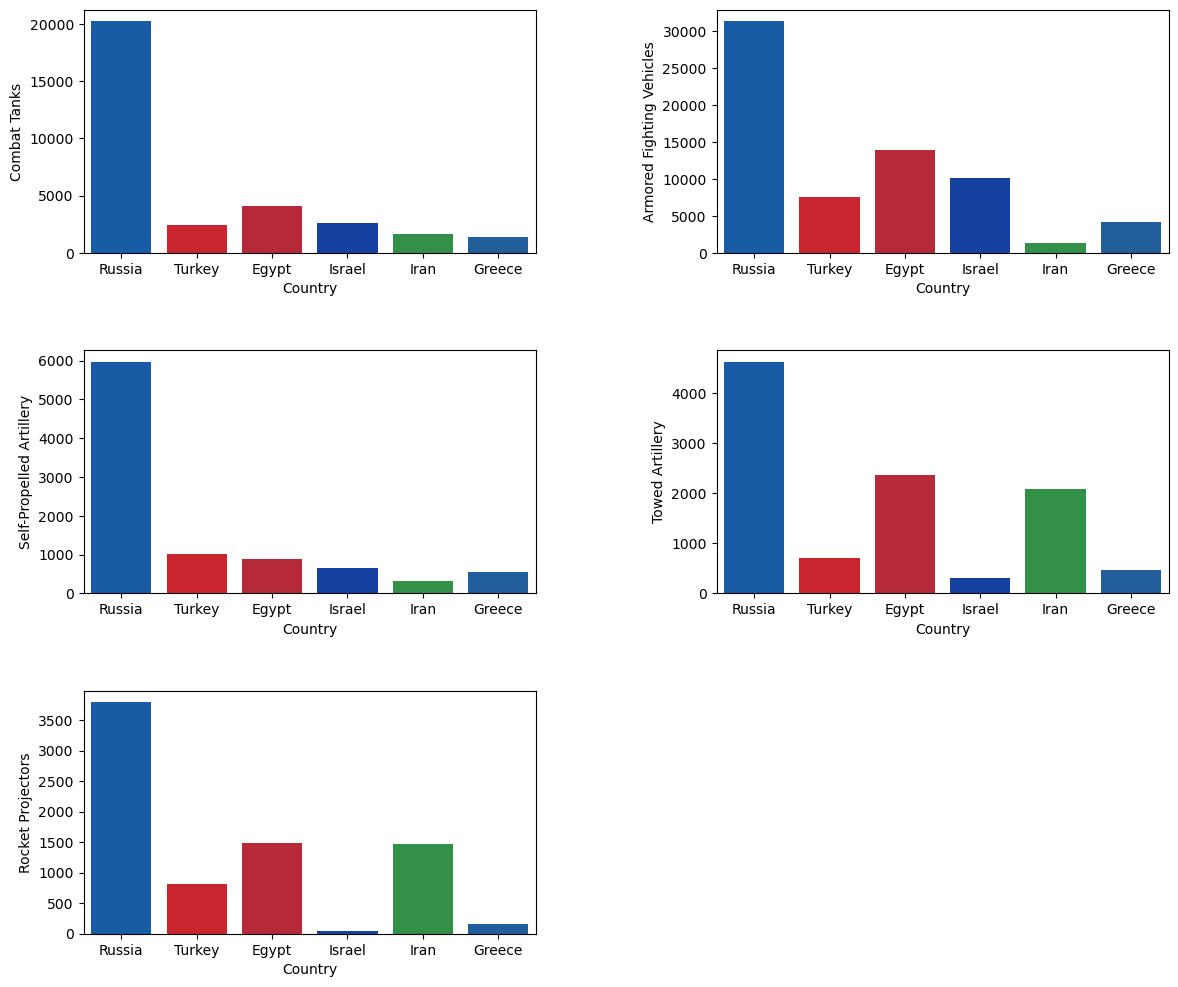

In [39]:
country_colors = {
    'Russia': '#005bbb', 
    'Egypt': '#ce1126', 
    'Turkey': '#e30a17', 
    'Greece': '#0d5eaf',  
    'Israel': '#0038b8',   
    'Iran': '#239f40'   
}

plt.figure(figsize=(14,12))
plt.subplot(3,2,1)
sns.barplot(data=landforce_df,x='Country',y='Combat Tanks',hue='Country',palette=country_colors,legend=False)

plt.subplot(3,2,2)
sns.barplot(data=landforce_df,x='Country',y='Armored Fighting Vehicles',hue='Country',palette=country_colors,legend=False)

plt.subplot(3,2,3)
sns.barplot(data=landforce_df,x='Country',y='Self-Propelled Artillery',hue='Country',palette=country_colors,legend=False)

plt.subplot(3,2,4)
sns.barplot(data=landforce_df,x='Country',y='Towed Artillery',hue='Country',palette=country_colors,legend=False)

plt.subplot(3,2,5)
sns.barplot(data=landforce_df,x='Country',y='Rocket Projectors',hue='Country',palette=country_colors,legend=False)

plt.subplots_adjust(wspace=0.4,hspace=0.4)

<h2>Analysis</h2>
<h3>From this visualization, it's evident that Russia significantly dominates in terms of ground warfare equipment, making direct comparison with other countries less informative.<br>
To better highlight the relative differences among the remaining nations, a separate visualization excluding Russia will be created</h3>

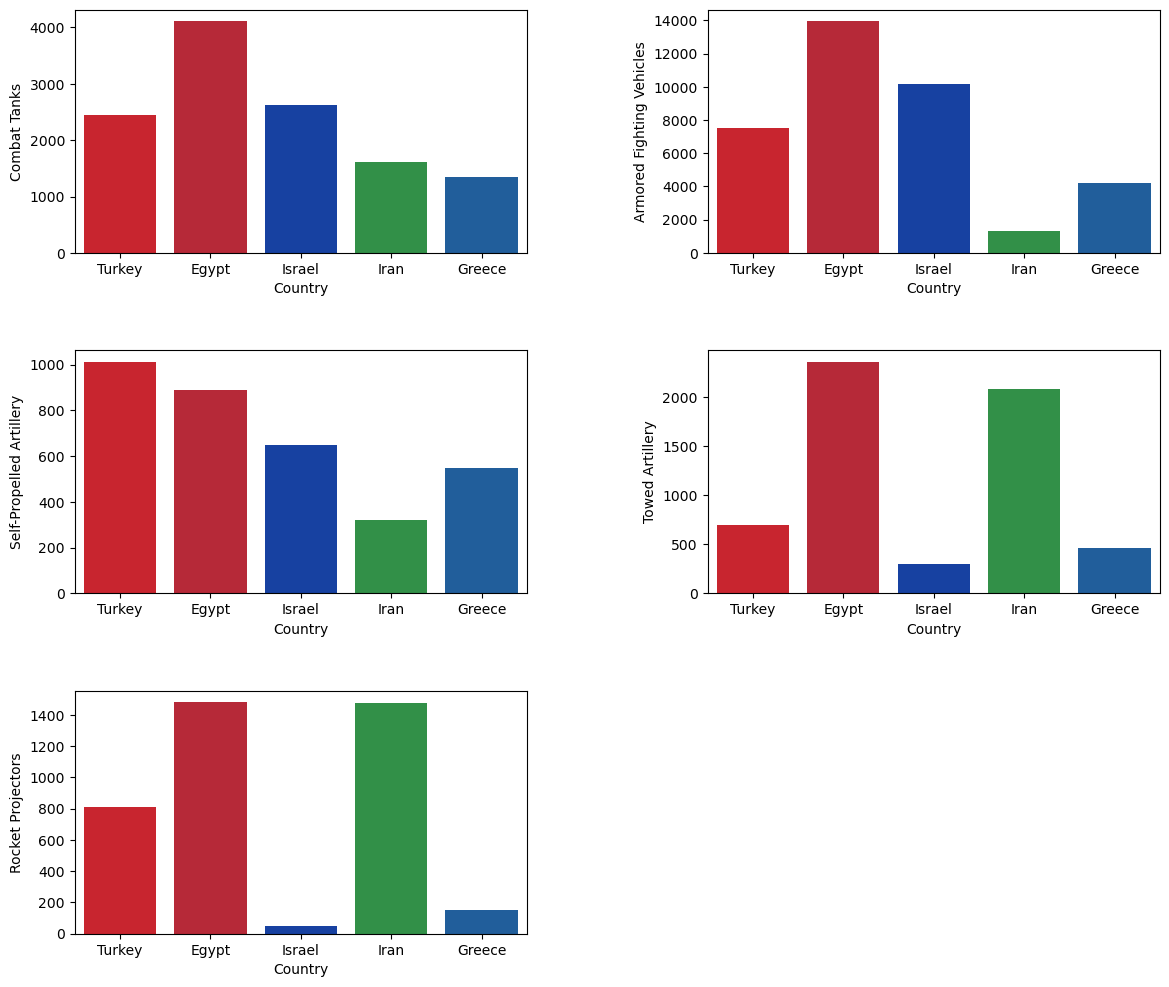

In [41]:
plt.figure(figsize=(14,12))
plt.subplot(3,2,1)
sns.barplot(data=landforce_df[landforce_df['Country'] != 'Russia'],x='Country',y='Combat Tanks',hue='Country',palette=country_colors,legend=False)

plt.subplot(3,2,2)
sns.barplot(data=landforce_df[landforce_df['Country'] != 'Russia'],x='Country',y='Armored Fighting Vehicles',hue='Country',palette=country_colors,legend=False)

plt.subplot(3,2,3)
sns.barplot(data=landforce_df[landforce_df['Country'] != 'Russia'],x='Country',y='Self-Propelled Artillery',hue='Country',palette=country_colors,legend=False)

plt.subplot(3,2,4)
sns.barplot(data=landforce_df[landforce_df['Country'] != 'Russia'],x='Country',y='Towed Artillery',hue='Country',palette=country_colors,legend=False)

plt.subplot(3,2,5)
sns.barplot(data=landforce_df[landforce_df['Country'] != 'Russia'],x='Country',y='Rocket Projectors',hue='Country',palette=country_colors,legend=False)

plt.subplots_adjust(wspace=0.4,hspace=0.4)

<h3>With Russia excluded, the visualization now allows for a clearer and more meaningful comparison between the remaining countries. Differences in ground force capabilities are now more visible, making it easier for analysing step</h3>

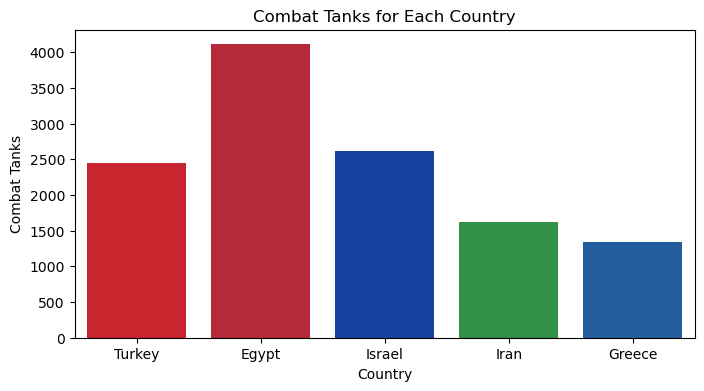

In [43]:
plt.figure(figsize=(8,4))
sns.barplot(data=landforce_df[landforce_df['Country'] != 'Russia'],x='Country',y='Combat Tanks',hue='Country',palette=country_colors,legend=False)
plt.title('Combat Tanks for Each Country')
plt.show()

<h2>Analysis</h2>
<h3>What are Combat Tanks?</h3>
<h3>Tanks are one of the most important pillars of ground forces, a crucial tool in offensive operations. They are heavily armored vehicles designed for direct combat on the front lines, combining firepower, protection, and mobility to control the battlefield.</h3>
<br>
<h3>What it is used for?</h3>
<h3>
- Destroying enemy defensive lines.<br>
- Supporting infantry by providing cover and heavy armor for soldiers.<br>
- Destroying enemy buildings, firepower centers, and war vehicles.<br>
- Protecting the borders from enemies</h3>
<br>
<h3>What we can get from this chart?</h3>
<h3>We can see Egypt's significant advantage over Turkey, and Israel's slight advantage in the number of tanks against Turkey.<br>
Yet, Turkey has the upper hand agaiant Iran and Greece.</h3>
<br>
<h2>Thoughts</h2>
<h3>If we examine why Egypt and Israel have so many tanks, we see that Egypt and Israel are enemies and border each other, posing a threat to each other. Israel is also surrounded by other enemies, such as Jordan, Lebanon, and Syria, and therefore both have a large number of tanks.<br>
On the other hand, Turkey is surrounded by Iran, Iraq, Georgia, and Armenia to the east, and Greece and Bulgaria to the west. Each of these countries is hostile to Turkey. Given that Turkey has a greater number of tanks than these countries, there is no harm in increasing the number of tanks in the event that some of these countries join forces and attack Turkey. As we mentioned, tanks shape a great importance in defense and ground attacks and we have seen that in huge wars such as WW1 and WW2. And since we are on the doors of possible WW3, we have to focus little bit on increasing the numbers of tanks<br><br>

Another thing. Egypt and Israel rely on buying tanks from other powerful countries like USA and Germany. While aslo Turkey has some bought tanks, nowadays it is working on a plan to manufacture its own tanks like Altay MBT. This advantage makes it better than other countries as it relies on itself and will be able to produce a larger quantity of tanks at a lower cost. This means that Turkey can surpass Egypt and Israel in terms of tanks.
<br>Oh the greatnes of Turkey!
</h3>

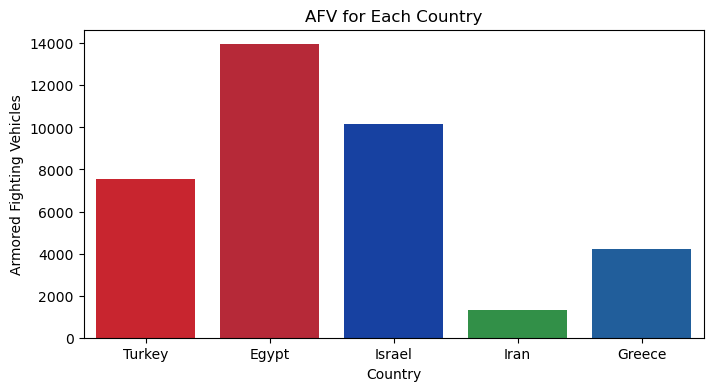

In [45]:
plt.figure(figsize=(8,4))
sns.barplot(data=landforce_df[landforce_df['Country'] != 'Russia'],x='Country',y='Armored Fighting Vehicles',hue='Country',palette=country_colors,legend=False)
plt.title('AFV for Each Country')
plt.show()

<h2>Analysis:</h2>
<h3>What are Armored Fighting Vehicles (AFV)?</h3>
<h3>They are armored vehicles capable of firing and fighting, but not with high efficiency. They are faster than other military vehicles. Their function is to transport and protect soldiers during transport operations.</h3>
<br>
<h3>What it is used for?</h3>
<h3>- Troop transport<br>
- Fire support<br>
- Fast maneuvers</h3>
<br>
<h3>What we can get from this chart?</h3>
<h3>We can see that Egypt and Israel have more than 10,000 AFV while Turkey is less than them.<br>
This vehicles are important for transportation, and they gave us an important element which is speed.</h3>
<br>
<h3>Why speed is important?</h3>
<h3>In my opinion. the element of speed is very important in wars. In fact, it is an element that great military leaders in history relied on fundamentally such as:<br><br>
<b>- Khalid Ibn Al-Waleed:</b><br>
Khalid is one of the few leaders who was never defeated in battle!<br>
Khalid relied on speed to confront his enemies, the Persian and Roman empires. He and his army did not carry or wear much armor, which gave them speed in confronting their enemies. They moved quickly to the battlefield and chose the position that gave them the advantage in combat. Also, due to their lack of armor, they were quick to strike, fight, maneuver, and circumnavigate their opponents. He also used the speed as an advantage to strike the enemy before they fully assemble. With this important factor, Khalid won every battle.
<br><br>
<b>- Napoleon:</b><br>
Napoleon is considered one of the greatest military leaders in history. This is due to his extreme intelligence in war planning and his analysis of battles in a way that made those who confronted him fear him!<br>
Beside using the geography to his advantage, Napoleon relied heavily in his plans on rapid movement and surprising the enemy. He did not carry food or heavy equipment with him. Instead, he relied on the resources, food, and some equipment available in the area he was heading to or in the areas he occupied after defeating his enemies.
<br><br>
<b>- Alexander The Great:</b><br>
Alexander is considered one of the greatest military leaders, having completely destroyed the Persian Empire without losing a battle in his life!<br>
He relied on his military plans, battle analysis, and the then-new Roman weapon (Sarissa). However, he also used speed to his advantage in some battles, such as the Battle of Guagamela, where he used his army's speed to outflank the Persian armies, whose heavy armor made them slow.
<br><br>
<b>- Genghis Khan:</b><br>
The great leader who established the largest empire in history, stretching from China in the east to Europe in the west!<br>
His army relied entirely on light cavalry and fighting from horses that moved at incredible speeds. His tactic was a quick attack followed by a feigned withdrawal to lure the enemy into deadly ambushes.
<br><br>
<b>- Erwin Rommel:</b><br>
One of the most famous German commanders of WW1, nicknamed the Desert Fox!<br>
He was famous for his tactics during WW1, which relied on maneuvers and rapid movement in the deserts of Africa. He avoided direct defensive lines and quickly bypassed his opponent, exploiting the open spaces of the desert.
<br><br>
And there are more and more commanders who relied on speed in their battles. The point I want to deliver is that the speed is an important factor in the military field.</h3>
<br>
<h2>Thoughts:</h2>
<h3>Turkey should produce little more of these vehicles, especially since they provide us with the speed factor in ground combat.<br>
Fortunately, we now have aircraft and helicopters that can replace AFVs for transporting troops and providing speed. However, there's no harm in increasing the number of these vehicles, especially since they are inexpensive and useful in ground combat.</h3>

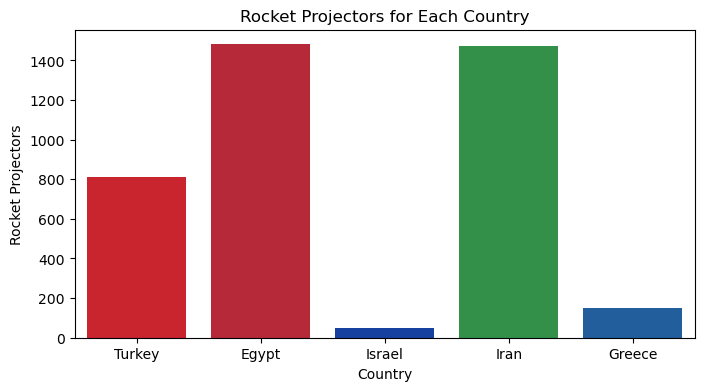

In [47]:
plt.figure(figsize=(8,4))
sns.barplot(data=landforce_df[landforce_df['Country'] != 'Russia'],x='Country',y='Rocket Projectors',hue='Country',palette=country_colors,legend=False)
plt.title('Rocket Projectors for Each Country')
plt.show()

<h2>Analysis</h2>
<h3>What are Rocket Projectors?</h3>
<h3>Rocket Projectors are important component of modern and traditional artillery forces.<br>
They are artillery systems that lunch unguided rockets over medium to long distances.</h3>
<br>
<h3>What they are used for?</h3>
<h3>- Bombard enemy areas/camps<br>
- Frighten the enemy with the loud sound of bombing<br>
- Help soldiers advance</h3>
<br>
<h3>What we can get from this chart?</h3>
<h3>We can see that Egypt and Iran are superior to Turkey, but does that mean they are better? Let's see:<br><br>
<b>- Egypt:</b><br>
Most of Egypt's missiles originate from the Soviet Union, and they have recently begun producing their own. However, Egyptian missiles are not of high quality due to the age of the Soviet missiles and the fact that their own locally produced missiles are not highly efficient. This has led them to recently import missiles from other countries.
<br><br>
<b>- Iran:</b><br>
Iran relies heavily on heavy bombardment using rocket projectors, as we saw when it bombed Israel on October 1, 2024.<br>
Iran believes that missiles are cheap and effective, which is why it produces huge quantities of rocket launchers.</h3>
<br>
<h2>Thoughts</h2>
<h3>Although Egypt and Iran have more rocket projectors than Turkey, they have focused on quantity over quality.<br>
Turkey has focused on quality over quantity. Turkish rocket projectors manufactured by Roketsan, such as the TRG, TOROS, BORA, and other series, feature high quality and accuracy. This, in my opinion, gives Turkey an advantage over Egypt and Iran.</h3>

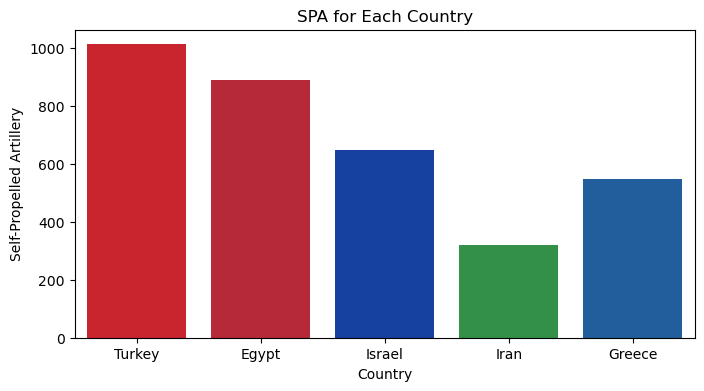

In [49]:
plt.figure(figsize=(8,4))
sns.barplot(data=landforce_df[landforce_df['Country'] != 'Russia'],x='Country',y='Self-Propelled Artillery',hue='Country',palette=country_colors,legend=False)
plt.title('SPA for Each Country')
plt.show()

<h2>Analysis:</h2>
<h3>What are Self-Propelled Artillery (SPA)?</h3>
<h3>Type of mobile artillery system that combines a large-caliber gun or howitzer with a motorized vehicle platform, allowing it to move and fire without needing to be towed.</h3>
<br>
<h3>What they are used for?</h3>
<h3>- Long range fire support<br>
- Felxible in terrain</h3>
<br>
<h3>What we can get from this chart?</h3>
<h3>We can see Turkey's superiority over other countries, and this is a positive thing given the importance of this military equipment in ground combat.</h3>
<br>
<h2>Thoughts</h2>
<h3>SPAs are extremely important in warfare, particularly as they allow us to bombard from long range, secure the path for soldiers, fire support during both offensive and definsive operations, and facilitate attacks on the enemy.<br>
What makes SPA especially valuable is their mobility and speed. SPAs can “shoot and move” quickly, reducing vulnerability to enemy counter-battery fire. This flexibility allows them to adapt to rapidly changing battlefield conditions — a crucial advantage in modern, fast-paced conflicts.</h3>

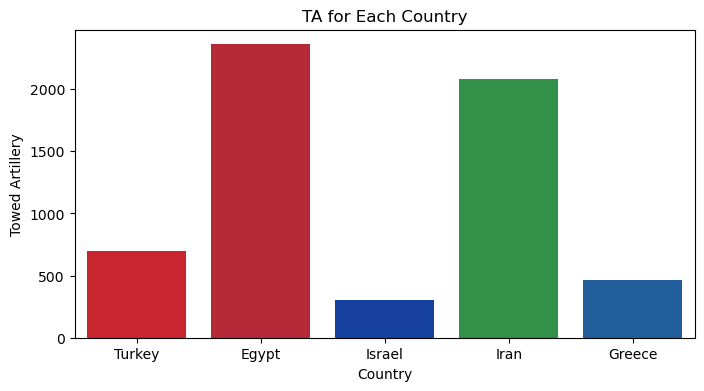

In [51]:
plt.figure(figsize=(8,4))
sns.barplot(data=landforce_df[landforce_df['Country'] != 'Russia'],x='Country',y='Towed Artillery',hue='Country',palette=country_colors,legend=False)
plt.title('TA for Each Country')
plt.show()

<h2>Analysis:</h2>
<h3>What is Towed Artillery (TA)?</h3>
<h3>It is like a SPA, but it is less efficient and can only be moved using trucks and is prepared and installed before use.</h3>
<br>
<h3>What is the difference between TA and SPA?</h3>
<h3>TA is cheaper and lighter, but slower, especially since it has to be installed and set up and takes time to refill.</h3>
<br>
<h3>What we can get from this chart?</h3>
<h3>Egypt and Iran have a great advantage in numbers, especially since they are the only two countries that have more than 1,000 TA</h3>
<br>
<h2>Thoughts:</h2>
<h3>These machines are considered outdated in warfare and are not widely used in modern battles, especially since they are slow and would cause us to lose the vital element of speed in warfare and make it easier for the enemy to maneuver.
<br>Therefore, in my opinion, there is little benefit in increasing the number, especially since, as we analyzed previously, we saw Turkey's superiority in the SPA, which is more important and superior to the TA.</h3>

<h2>Lastly. Custom Landforce Strength Ranking Formula</h2>
<h3>Now it is the time for the ranking according to the lanforce strength, we will rank the countries based on a custom formula that combines every lanforce eqiupment.<br>
The formula used is:<br>
Lanforce Score =<br>(Combat Tanks x 0.35) + (Rocket Projectores x 0.25) + (SPA x 0.2) + (AFV × 0.15) + (TA x 0.05)<br><br>
    
This formula was designed to measure and compare a country's ground warfare capabilities by integrating both the total volume of land-based equipment and the combat value of each component:<br>

- Combat Tanks (35%): Heavy armor remains the spearhead of direct ground assaults. This component reflects a nation's capacity for large-scale armored engagements and battlefield dominance.<br>

- Rocket Projectors (25%): These systems provide devastating area-fire capabilities, essential for softening enemy defenses and supporting offensives across wide terrains.<br>

- Self-Propelled Artillery (20%): Combines firepower with high mobility, allowing rapid deployment and support in fluid, modern battlefields.<br>

- Armored Fighting Vehicles (15%): Increases tactical flexibility and enhances infantry survivability, particularly in mechanized warfare scenarios.<br>

- Towed Artillery (5%): While less mobile, towed systems still play a vital role in static defense and long-range fire support.<br>
<br><br>

By giving higher weight to total landforce (30%), the formula emphasizes the strategic importance of maintaining a large and deployable force. At the same time, it acknowledges the decisive battlefield value of tanks and rocket artillery, and the mobility and flexibility of self-propelled systems.<br>
The result is a realistic and balanced index that ranks countries based not only on the size of their ground forces, but also on the combat effectiveness of those forces in modern warfare.</h3>

In [54]:
features = [ 'Combat Tanks', 'Rocket Projectors', 'Self-Propelled Artillery', 'Armored Fighting Vehicles', 'Towed Artillery']
scalar = MinMaxScaler()
normalized = scalar.fit_transform(landforce_df[features])
weights = [0.35, 0.25, 0.2, 0.15, 0.05]
landorce_score = normalized @ weights
landforce_df['Landforce Score'] = [round(lf_score * 100,2) for lf_score in landorce_score]
landforce_df = landforce_df.sort_values(by='Landforce Score', ascending=False)
landforce_df['Rank (Landforce)'] = np.arange(1,7)
landforce_df.set_index('Rank (Landforce)',inplace=True)
landforce_df

,Country,Rank (Global),Combat Tanks,Armored Fighting Vehicles,Self-Propelled Artillery,Towed Artillery,Rocket Projectors,Landforce Score
Rank (Landforce),,,,,,,,
1,Russia,2,20216,31298,5972,4625,3793,100.00
2,Egypt,10,4110,13949,889,2360,1481,25.41
3,Turkey,8,2445,7550,1013,697,811,13.16
4,Iran,21,1616,1315,320,2078,1474,12.08
5,Israel,15,2620,10185,650,300,48,7.97
6,Greece,28,1345,4209,547,463,152,3.13


<h2>Analysis</h2>
<h3>In terms of ranking, Turkey is ranked 3rd, behind Russia and Egypt, and ahead of Iran, Israel, and Greece.
<br>This is considered good. Why?</h3>
<h3>1. Although Egypt has a higher score, as we analyzed previously, it relies on purchasing equipment manufactured by other countries, while Turkey produces its own equipment. This is preferable, especially since it allows Turkey to increase the number of equipment at a lower cost. This ensures safety because it manufactures the equipment, not reliying on another countries, which guarantees quality. And speaking of quality.<br><br>
2. As we saw in the previous analysis, Egypt relied on quantity over quality, while Turkey relies on quality over quantity. In my opinion, Turkey outperforms Egypt, especially since focusing on quality is better than focusing on quantity.
<br>
<h2>Thoughts</h2>
<h3>In my opinion, Turkey surpasses Egypt for the mentioned reasons.<br>
I'm not saying the number isn't important. I think there should still be some focus on increasing the quantity.<br>
But Turkey's work in the military industry is tremendous, especially since it is of world-class quality. The proof is that many countries rely on Turkish vehicles and weapons for their excellent quality.<br>
That's why I believe Turkey has outperformed the other countries mentioned (except Russia). This is because it focused on quality over quantity.<br>
Turkey is truly a great and powerful country!
</h3>

<h2>Chapter 3: Navalforce 🚢</h2>

In [57]:
navalforce_df = countries_df[['Country','Rank (Global)','Total Naval Assets',
                              'Aircraft Carriers', 'Frigates', 'Destroyers', 'Corvettes',
                              'Submarines', 'Patrol Craft', 'Mine Warfare Vessels']]
navalforce_df

,Country,Rank (Global),Total Naval Assets,Aircraft Carriers,Frigates,Destroyers,Corvettes,Submarines,Patrol Craft,Mine Warfare Vessels
1,Russia,2,352,1,6,15,81,63,28,46
7,Turkey,8,194,1,16,0,9,12,34,11
9,Egypt,10,319,0,9,0,2,5,227,23
14,Israel,15,65,0,0,0,3,6,32,0
20,Iran,21,398,0,5,0,3,33,230,10
27,Greece,28,115,0,13,0,0,11,25,4


<h3>Before starting.<br>
I want to make the Frigates and Destroyers as one column. Why?<br><br>
1- According to NATO, frigates and destroyers are similar with few tiny differences.<br><br>
2- All the countries (Except Russia) have 0 destroyers.<br><br>
3- Turkey has frigates that are considered as destroyers or even better than many destroyers around the world. So, if we did analysis while Turkey having 0 destroyers, it is not going to give us a realistic results.
</h3>

In [59]:
navalforce_df.rename(columns={'Frigates':'Frigates/Destroyers'},inplace=True)
navalforce_df
navalforce_df['Frigates/Destroyers'] = navalforce_df['Frigates/Destroyers'] + navalforce_df['Destroyers']
navalforce_df.drop('Destroyers',axis=1,inplace=True)
navalforce_df

,Country,Rank (Global),Total Naval Assets,Aircraft Carriers,Frigates/Destroyers,Corvettes,Submarines,Patrol Craft,Mine Warfare Vessels
1,Russia,2,352,1,21,81,63,28,46
7,Turkey,8,194,1,16,9,12,34,11
9,Egypt,10,319,0,9,2,5,227,23
14,Israel,15,65,0,0,3,6,32,0
20,Iran,21,398,0,5,3,33,230,10
27,Greece,28,115,0,13,0,11,25,4


<h2>First of all. Lets visualize the columns to check if there is a need for cleaning.</h2>

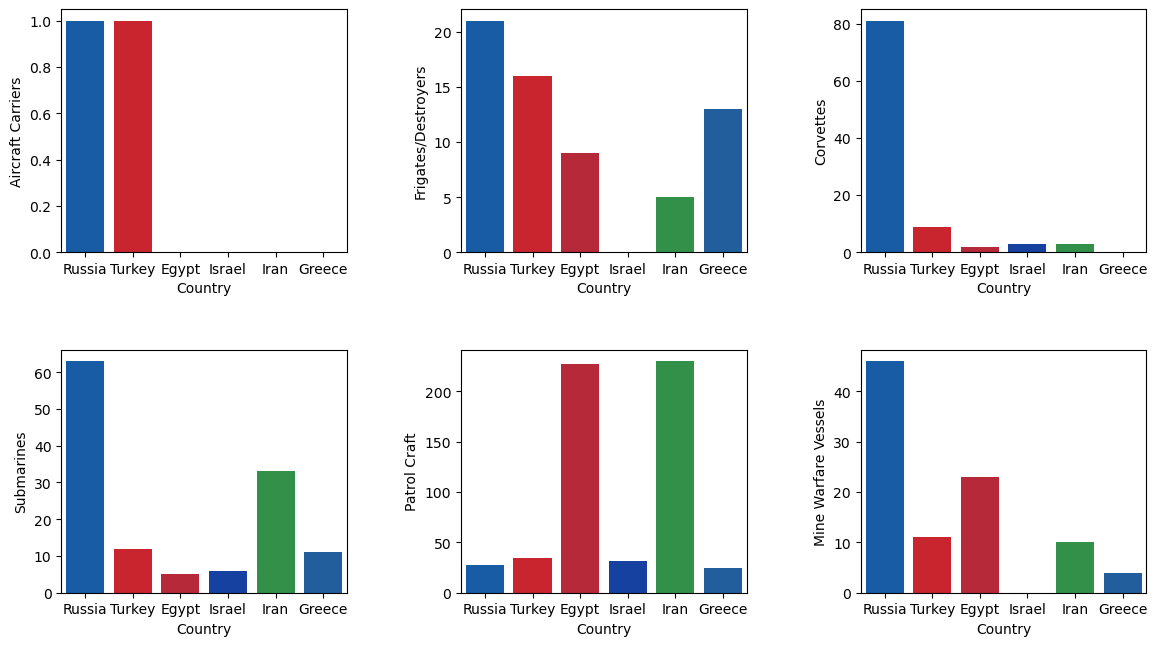

In [61]:
country_colors = {
    'Russia': '#005bbb', 
    'Egypt': '#ce1126', 
    'Turkey': '#e30a17', 
    'Greece': '#0d5eaf',  
    'Israel': '#0038b8',   
    'Iran': '#239f40'   
}

plt.figure(figsize=(14,12))
plt.subplot(3,3,1)
sns.barplot(data=navalforce_df,x='Country',y='Aircraft Carriers',hue='Country',palette=country_colors,legend=False)

plt.subplot(3,3,2)
sns.barplot(data=navalforce_df,x='Country',y='Frigates/Destroyers',hue='Country',palette=country_colors,legend=False)

plt.subplot(3,3,3)
sns.barplot(data=navalforce_df,x='Country',y='Corvettes',hue='Country',palette=country_colors,legend=False)

plt.subplot(3,3,4)
sns.barplot(data=navalforce_df,x='Country',y='Submarines',hue='Country',palette=country_colors,legend=False)

plt.subplot(3,3,5)
sns.barplot(data=navalforce_df,x='Country',y='Patrol Craft',hue='Country',palette=country_colors,legend=False)

plt.subplot(3,3,6)
sns.barplot(data=navalforce_df,x='Country',y='Mine Warfare Vessels',hue='Country',palette=country_colors,legend=False)

plt.subplots_adjust(wspace=0.4,hspace=0.4)

<h3>Although there are some charts where Russia dominates, the data is still clear and understandable.<br>
Lets start.</h3>

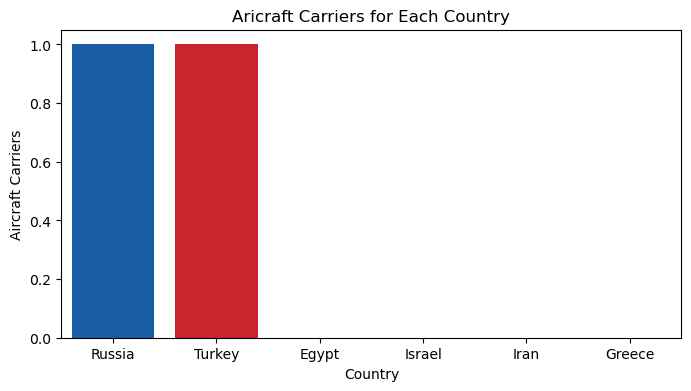

In [63]:
plt.figure(figsize=(8,4))
sns.barplot(data=navalforce_df,x='Country',y='Aircraft Carriers',hue='Country',palette=country_colors,legend=False)
plt.title('Aricraft Carriers for Each Country')
plt.show()

<h2>Analysis</h2>
<h3>What are Aircraft Carriers?</h3>
<h3>Aircraft carriers are giant naval vessels designed as mobile airports over the seas, enabling warplanes to take off from anywhere in the seas and oceans.<br>
Not only that, they also contain a high-level offensive and defensive system to protect them from any external threat. Some carriers contain five or more defensive systems, not to mention high-quality radar systems.
These systems can protect them from warplanes or drones, as well as from warships and submarines. These vessels are essentially floating military bases.</h3>
<br>

<h3>Why they are important?</h3>
<h3>Warplanes can take off from anywhere in the seas without relying on military bases in other countries.<br>

They can carry numerous aircraft, helicopters, and UAVs, which are the three most important warships in modern warfare.<br>

They possess superior defense and offensive systems, even more powerful and superior to those of some entire countries. They also possess high-precision radar systems.<br>

They act as an airport or a mobile military base on the water, preventing countries that possess them from relying on military bases in foreign countries.<br>

Very few countries possess aircraft carriers, which gives those that possess them significant points on the Global Power Index.
</h3>

<h3>What we can get from this chart?</h3>
<h3>We can see that there are only two countries that have aircraft carriers, which are Turkey and Russia.</h3>
<br>

<h2>Thoughts</h2>
<h3>Given the importance of this vessel in modern warfare and the fact that only a few countries possess it, we must salute Turkey for its great work in producing an aircraft carrier. Let's delve into the Turkish TCG Anadolu aircraft carrier:<br>
It is a 27,000-pound, 231-meter-long aircraft carrier. It can carry drones such as the Bayraktar TB2, TB3, and Kızılelma, helicopters, and F-35 fighter jets (if available).<br>
Its defense system includes high-resolution radars, jamming systems, and electronic protection. It also has a rapid-fire cannons to intercept missiles, aircraft, and drones at short range, as well as artillery stations to counter small boats and ships.<br>
It is a vessel that contains most of the defense systems, but it is not complete. It lacks an anti-submarine defense system, nor does it have sea-to-sea missiles. But overall, this powerful Turkish-made vessel gives Turkey a powerful naval force, especially since it can launch high quality drones.</h3>

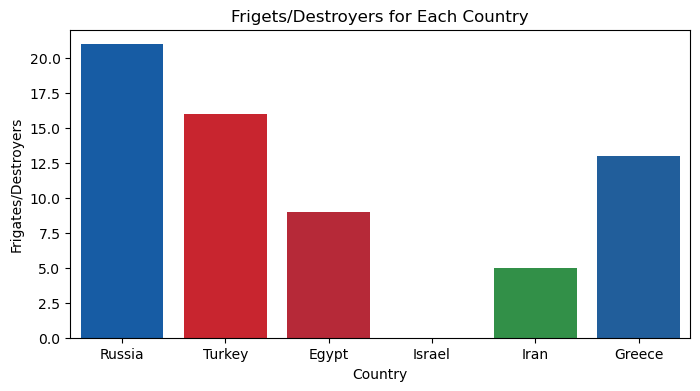

In [65]:
plt.figure(figsize=(8,4))
sns.barplot(data=navalforce_df,x='Country',y='Frigates/Destroyers',hue='Country',palette=country_colors,legend=False)
plt.title('Frigets/Destroyers for Each Country')
plt.show()

<h2>Analysis</h2>
<h3>What are Frigates/Destroyers?</h3>
<h3>They are fast and powerful armored naval vehicles, important in military naval fleets and widely used because they are designed for a variety of missions.<br>
These vehicles contain powerful, high-quality defense and offensive systems, equipped with machine guns and missiles for defense and attack against naval, air, and even land vehicles.</h3>
<br>
<h3>Why they are important?</h3>
<h3>They are considered of great importance to naval forces, due to their multi-tasking capabilities, such as:

- Protecting aircraft carriers and other naval vessels from any attack, whether air or sea.

- They are not only used for defense, but also for offense, as they are used to attack other naval vessels.

- Anti-submarine warfare, due to their high-quality radars and powerful weapons such as machine guns and missiles.

- They can also strike from the seas to land, and are therefore used as a long-range offensive weapon against other countries without the need to be present on enemy territory.

- They provide additional points in the global power index, especially since many countries do not possess a large number of these critically important vessels for their naval fleet.</h3>
<h3>What we can get from this chart?</h3>
<h3>Russia and Turkey are superior to other countries, and we can also note that Israel does not have any frigates or destroyers.</h3>
<br>
<h2>Thoughts</h2>
<h3>We can see Turkey's superiority over other countries (except Russia). The beauty of this is that Turkey not only has a numerical advantage, but also a superiority in quality. It has acquired high-quality frigates from the United States and Germany, and even better, it has begun manufacturing its own domestically produced frigates, such as the Istanbul Class.<br>
The Turkish-made frigates are equipped with a radar command system, high-precision eavesdropping and jamming devices, and powerful weapons such as Atmaca missiles and machine guns, enabling these vessels to defend or attack any potential threat, whether at sea, in the air, or on land.<br><br>

Why are frigates so important to Turkey?<br>
Let's not forget that Turkey is surrounded by sea on almost all sides and requires numerous warships for its own protection.<br>
We also note that most countries do not prioritize naval power, which gives Turkey a naval advantage if it enters into wars with other countries.</h3>

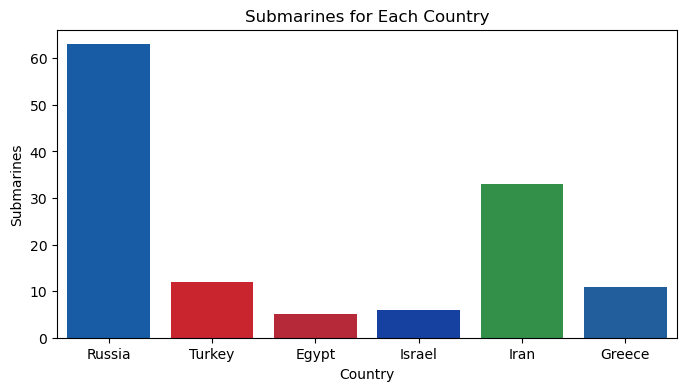

In [67]:
plt.figure(figsize=(8,4))
sns.barplot(data=navalforce_df,x='Country',y='Submarines',hue='Country',palette=country_colors,legend=False)
plt.title('Submarines for Each Country')
plt.show()

<h2>Analysis</h2>
<h3>What are Submarines?</h3>
<h3>They are underwater military naval vehicles. They are among the most dangerous naval vehicles any army could possess, as they can cause significant damage without being noticed due to their underwater location. They were originally designed for stealth and unexpected stealthy attacks.</h3>
<br>
<h3>Why it is important?</h3>
<h3>These are vehicles designed for attack, and they are of great importance due to their offensive power and ability to hide underwater. These are their most important points:<br>

- Stealth under water.

- Inflicting significant damage to the enemy using cruise missiles or torpedoes, whether the enemy is on land or at sea.

- They can secretly locate enemy naval vessels.

- Some submarines can carry and launch nuclear weapons, making them extremely dangerous.</h3>
<h3>What we can get from this chart?</h3>
<h3>We see Russia's significant superiority in the number of submarines, as it produces submarines dating back to the days of the Soviet Union. We can also see that Iran has more submarines than Turkey, Egypt, Greece, and Israel.</h3>
<br>
<h2>Thoughts</h2>
<h3>It's true that we talked about its importance as if it were the most powerful thing in naval forces, but that was during the days of WW1 and WW2. Now, frigates are produced to deter submarines, as frigates are considered the greatest enemy and the way to stop and destroy them.<br>
Since we have seen Turkey's superiority over all other countries in terms of frigates, I do not see any need to increase the production of submarines, especially since there is a plan to produce more frigates in the future, which in my opinion are considered more important, stronger and better than submarines.</h3>

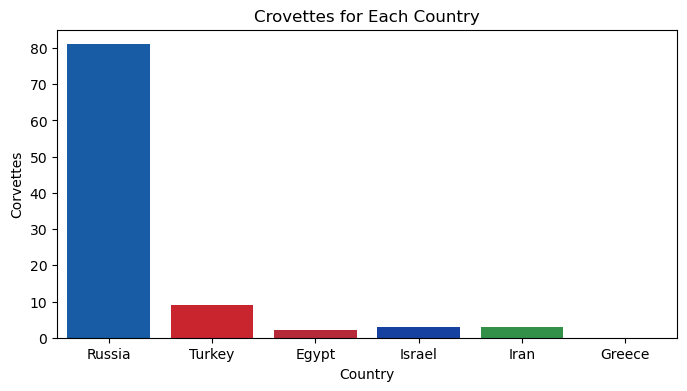

In [69]:
plt.figure(figsize=(8,4))
sns.barplot(data=navalforce_df,x='Country',y='Corvettes',hue='Country',palette=country_colors,legend=False)
plt.title('Crovettes for Each Country')
plt.show()

<h3>Due to Russia's sweep, another visualazation will be made to facilitate the analysis process.</h3>

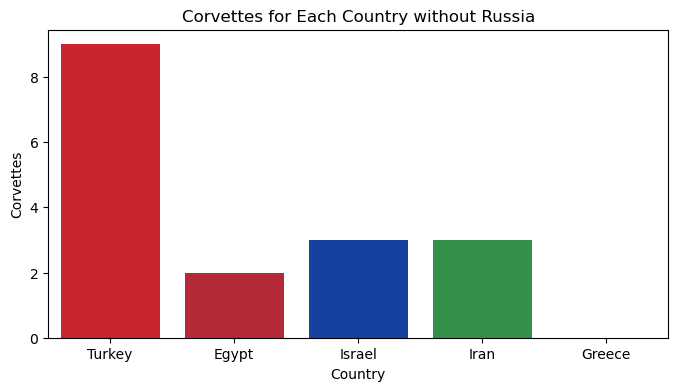

In [71]:
plt.figure(figsize=(8,4))
sns.barplot(data=navalforce_df[navalforce_df['Country'] != 'Russia'],x='Country',y='Corvettes',hue='Country',palette=country_colors,legend=False)
plt.title('Corvettes for Each Country without Russia')
plt.show()

<h2>Analysis</h2>
<h3>What are Corvettes?</h3>
<h3>Small-to-medium sized military naval vessels, smaller than frigates.<br>
They are used primarily for coastal protection missions and are sometimes used as defensive and offensive naval vessels in warfare. They are equipped with torbedoes missiles for anti-submarine warfare, anti-ship missiles, and machine guns.</h3>
<br>
<h3>What they are used for?</h3>
<h3>
Protecting coasts and seaports.<br><br>

Protecting other warships.

Detecting terrorist or illegal activities near a country's coast.

Used for simple missions, such as attacking an enemy that lacks powerful naval vessels, instead of using frigates.</h3>

<h3>What we can get from this chart?</h3>
<h3>If we do not take into account the Russian sweep, we will see that Turkey is superior to other countries, and this is important for Turkey as a country surrounded by seas.</h3>
<br>
<h2>Thoughts</h2>
<h3>It's good that Turkey has a good number of these vessels, given that Turkey is a country surrounded by water on almost all sides. These vessels help monitor the coasts and protect them from terrorist or illegal acts. They can also be used to defend or attack enemies with weaker warships instead of using frigates.</h3>

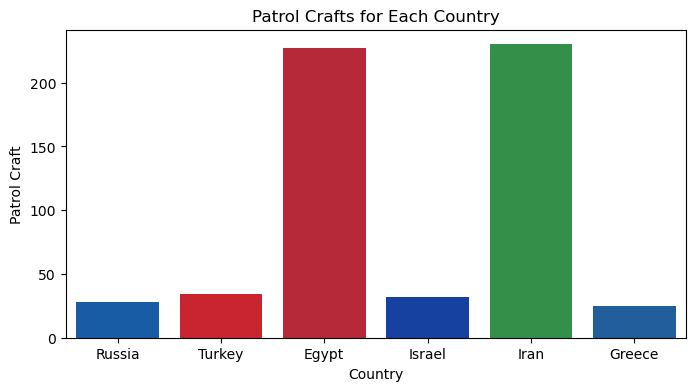

In [73]:
plt.figure(figsize=(8,4))
sns.barplot(data=navalforce_df,x='Country',y='Patrol Craft',hue='Country',palette=country_colors,legend=False)
plt.title('Patrol Crafts for Each Country')
plt.show()

<h2>Analysis</h2>
<h3>What are Patrol Crafts?</h3>
<h3>Small but fast-moving military vessels. They cannot fight effectively, but are designed to carry out surveillance, interception, and securing countries' maritime borders and coasts.</h3>
<br>
<h3>What they are used for?</h3>
<h3>They are designed to perform small, easy-to-use missions near countries' coasts and maritime borders. Their missions include:

- Protecting coasts and maritime borders from smuggling and illegal immigration.

- Protecting seaports from small-scale threats.</h3>
<h3>What we can get from this chart?</h3>
<h3>We can notice that Egypt and Iran are superior to the rest of the countries that are close in numbers.</h3>
<br>
<h2>Thoughts</h2>
<h3>If we search for why Iran and Egypt have so many Patrol Crafts, we will find the following results:<br><br>

Egypt:<br>
Egypt has purchased many of these vessels from Germany and the United States due to their low cost and their benifits in protecting its coasts and maritime borders. Egypt needs these vessels to protect its coasts, as its coasts are a major source of national income from tourism.
<br><br>
Iran:<br>
Because Iran lacks a naval force and large, high-level warships to compete with its enemies such as the United States, Israel, and others, it relies on these cheap, small, and fast ships to attack in large numbers using a hit-and-run tactic.
<br><br>
As for Turkey:<br>
Turkey possesses a fair number of these vessels, and since their purpose is not to engage in combat, Turkey is in a very good position with regard to these ships, as it has a sufficient number to carry out the specific tasks of the Patrol Craft.
</h3>

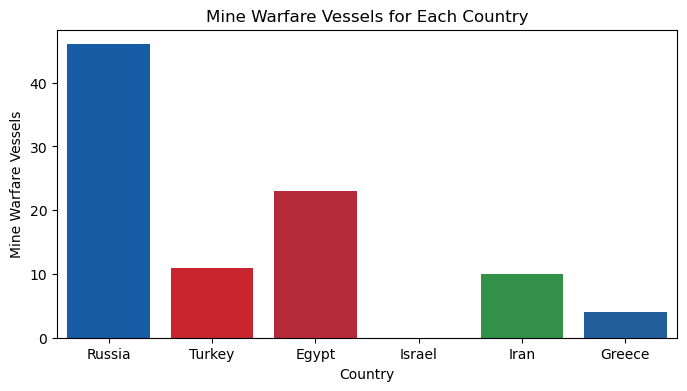

In [75]:
plt.figure(figsize=(8,4))
sns.barplot(data=navalforce_df,x='Country',y='Mine Warfare Vessels',hue='Country',palette=country_colors,legend=False)
plt.title('Mine Warfare Vessels for Each Country')
plt.show()

<h2>Analysis</h2>
<h3>What are Mine Warfare Vessels?</h3>
<h3>They are marine ships designed to track, detect, and remove mines from the seas. These vehicles are important for several reasons.</h3>
<br>
<h3>Why they are important?</h3>
<h3>They are important because they are used to maintain state security, secure the seas for merchants, and for military purposes. Their most important uses are:<br>

- Removing mines from seas used by tourists, citizens, and fishermen.

- They help secure sea routes for merchants and commercial vessels carrying goods, whether domestic or international.

- They can protect warships costing millions or billions of dollars from mines whose value may not exceed thousands.

- Decontaminating and cleaning the seas of war remnants.

- Securing areas from traps before landing troops or military vehicles in other countries.<br><br>

As you can see, they are not used for attack, but they assist in military operations and help protect the state and its citizens.</h3>
<h3>What we can get from this chart?</h3>
<h3>Russia has a large number of these ships, while Israel does not have a single one.</h3>
<br>
<h2>Thoughts</h2>
<h3>Despite their importance, drones can now perform their missions at a lower production cost, and this is what Turkey is relying on.</h3>

<h2>Lastly. Custom Navalforce Strength Ranking Formula</h2>
<h3>As usual, at the end of the chpater I do a ranking using a special formula to determine the strength of the countries in the navalforce.<br>
The formula used is:<br>
Navalforce Score =<br>(Air Carriers × 0.35) + (Frigates x 0.25) + (Submarines x 0.2) + (Corvettes x 0.1) + (Petrol Crafts x 0.05) + (Mine Warfare Vessels x 0.05)<br><br>
    
This formula was designed to measure the naval strength of nations and make comparisons easier. Why this formula?<br>
- Aircraft Carriers (35%): Given its extreme importance and strength in naval and air forces, I decided to give it the largest percentage because, in my opinion, it is the most important naval vessel, especially since only a few countries possess it.<br>

- Frigates (25%): For its defensive and offensive uses, and because it is considered the most powerful warship dedicated to combat, and for this reason it represents this percentage..<br>

- Submarines (20%): Because they are used in attacks, due to their strength and ability to hide, and because they are the primary enemy of frigates and aircraft carriers in the seas.<br>

- Corvettes (10%): Although they are less powerful than frigates and are not primarily used in battle, they are still important in naval forces as they assist powerful warships.<br>

- Petrol Crafts (5%):Because it is not used in wars and because it is weak compared to other warships, and we must not forget that it is cheap in value.<br>

- Mine Warfare (5%): Vessels that only function to protect against mines, and cannot attack. Currently, countries are using drones instead.<br>
<br><br>

In [78]:
features = [ 'Aircraft Carriers',
            'Frigates/Destroyers', 'Submarines', 'Corvettes',
            'Patrol Craft','Mine Warfare Vessels']
scalar = MinMaxScaler()
normalized = scalar.fit_transform(navalforce_df[features])
weights = [0.35, 0.25, 0.2, 0.1, 0.05, 0.05]
navalforce_score = normalized @ weights
navalforce_df['Navalforce Score'] = [round(nv_score * 100,2) for nv_score in navalforce_score]
navalforce_df = navalforce_df.sort_values(by='Navalforce Score', ascending=False)
navalforce_df['Rank (Navalforce)'] = np.arange(1,7)
navalforce_df.set_index('Rank (Navalforce)',inplace=True)
navalforce_df

,Country,Rank (Global),Total Naval Assets,Aircraft Carriers,Frigates/Destroyers,Corvettes,Submarines,Patrol Craft,Mine Warfare Vessels,Navalforce Score
Rank (Navalforce),,,,,,,,,,
1,Russia,2,352,1,21,81,63,28,46,95.07
2,Turkey,8,194,1,16,9,12,34,11,58.99
3,Iran,21,398,0,5,3,33,230,10,22.06
4,Egypt,10,319,0,9,2,5,227,23,18.39
5,Greece,28,115,0,13,0,11,25,4,17.98
6,Israel,15,65,0,0,3,6,32,0,0.89


<h2>Analysis</h2>
<h3>Russia, as usual, is overwhelmingly ahead of everyone else. It possesses an aircraft carrier and the largest number of frigates, corvettes, and submarines.<br><br>

Turkey ranks second, demonstrating its naval strength. This is particularly remarkable given that Turkey needs a naval force due to its proximity to the seas.

Iran ranks third, possessing a disproportionate number of submarines and patrol craft compared to others. This demonstrates Iran's focus on stealth and hit-and-run tactics.

As for Israel, we can observe the weakness of its naval power, as it lacks an aircraft carrier, a frigate, or mine warfare vessels. This demonstrates Israel's lack of focus on this area, despite its proximity to the sea on its left side.</h3>

<h2>Thoughts</h2>
<h3>It's good to see Turkey boasting a naval force superior to other countries. This gives Turkey high scores on the Global Power Index and makes other countries fear Turkey at seas, especially since it focuses on quality and numbers.
<br>Since few countries focus on the naval aspect, this is excellent for Turkey and an important point, especially since Turkey focuses on developing their own ships and vessels locally. This is what makes Turkey such a powerful country, as it focuses on and prioritizes all aspects of military power.
<br><br>
Also Turkey is planning on producing unmanned naval vessels to protect the nearby seas, which there is no navalforce is working to establish like this project. This gives Turkey significant advantage for the future.</h3>

<h2>Chapter 4: Airforce 🚀</h2>

In [81]:
airforce_df = countries_df[['Country','Rank (Global)','Total Aircraft Strength',
                            'Fighter Aircraft', 'Attack Aircraft', 'Transport Aircraft',
                            'Trainer Aircraft', 'Attack Helicopters']]
airforce_df

,Country,Rank (Global),Total Aircraft Strength,Fighter Aircraft,Attack Aircraft,Transport Aircraft,Trainer Aircraft,Attack Helicopters
1,Russia,2,3794,806,1438,1124,387,490
7,Turkey,8,1018,207,207,439,276,70
9,Egypt,10,1132,337,427,260,384,46
14,Israel,15,652,243,243,101,219,48
20,Iran,21,477,137,137,203,79,12
27,Greece,28,600,206,206,215,146,29


<h3>I'm going to re-calculate the 'Total Aircraft Strength' since the values are incorrect.</h3>

In [83]:
airforce_df['Total Aircraft Strength'] = airforce_df['Fighter Aircraft'] + airforce_df['Attack Aircraft'] + airforce_df['Transport Aircraft'] + airforce_df['Trainer Aircraft'] + airforce_df['Attack Helicopters']
airforce_df

,Country,Rank (Global),Total Aircraft Strength,Fighter Aircraft,Attack Aircraft,Transport Aircraft,Trainer Aircraft,Attack Helicopters
1,Russia,2,4245,806,1438,1124,387,490
7,Turkey,8,1199,207,207,439,276,70
9,Egypt,10,1454,337,427,260,384,46
14,Israel,15,854,243,243,101,219,48
20,Iran,21,568,137,137,203,79,12
27,Greece,28,802,206,206,215,146,29


<h3>Now we are good to go.</h3>

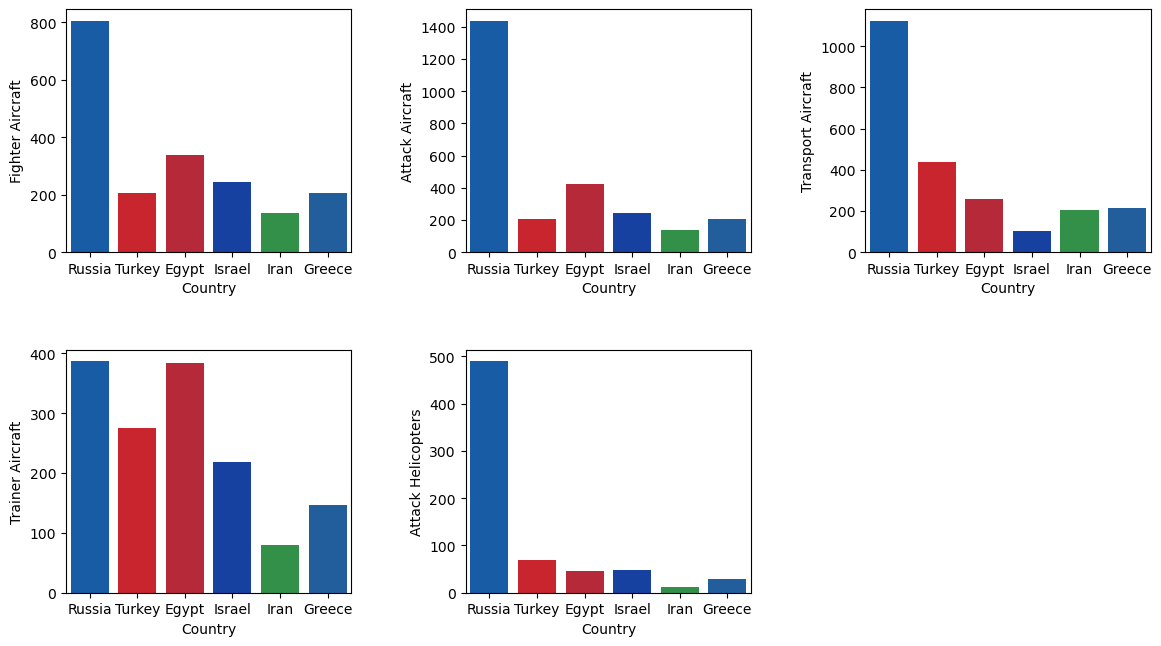

In [85]:
country_colors = {
    'Russia': '#005bbb', 
    'Egypt': '#ce1126', 
    'Turkey': '#e30a17', 
    'Greece': '#0d5eaf',  
    'Israel': '#0038b8',   
    'Iran': '#239f40'   
}

plt.figure(figsize=(14,12))
plt.subplot(3,3,1)
sns.barplot(data=airforce_df,x='Country',y='Fighter Aircraft',hue='Country',palette=country_colors,legend=False)

plt.subplot(3,3,2)
sns.barplot(data=airforce_df,x='Country',y='Attack Aircraft',hue='Country',palette=country_colors,legend=False)

plt.subplot(3,3,3)
sns.barplot(data=airforce_df,x='Country',y='Transport Aircraft',hue='Country',palette=country_colors,legend=False)

plt.subplot(3,3,4)
sns.barplot(data=airforce_df,x='Country',y='Trainer Aircraft',hue='Country',palette=country_colors,legend=False)

plt.subplot(3,3,5)
sns.barplot(data=airforce_df,x='Country',y='Attack Helicopters',hue='Country',palette=country_colors,legend=False)

plt.subplots_adjust(wspace=0.4,hspace=0.4)

<h3>Since Russia dominates again, I'm going to do another visualazation</h3>

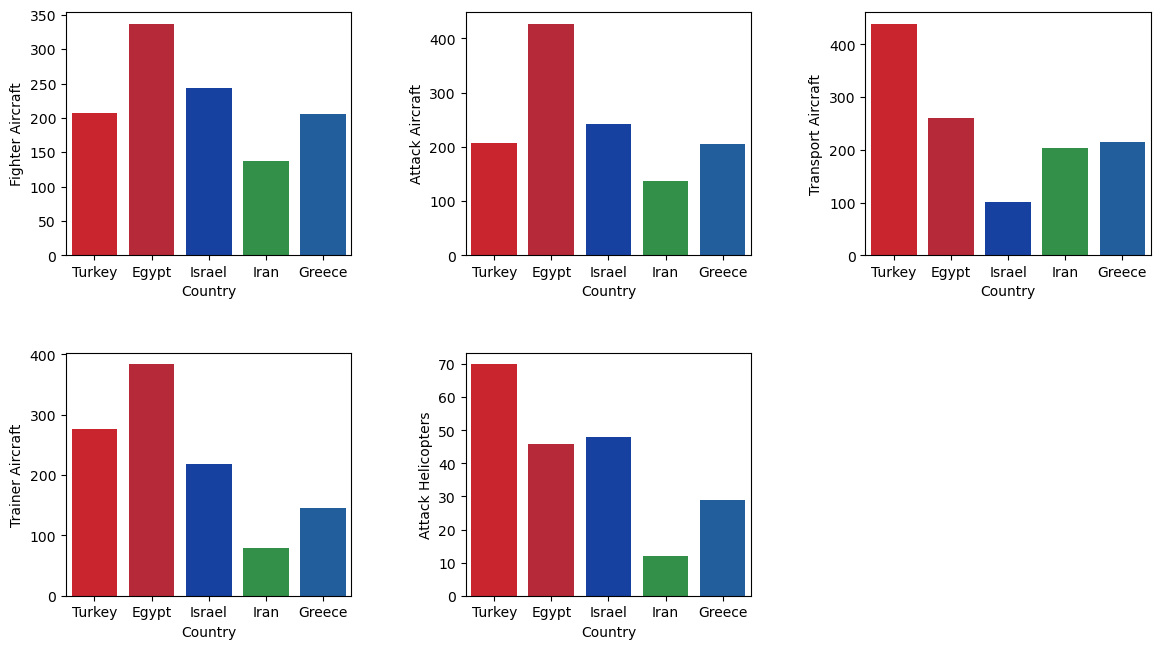

In [87]:
country_colors = {
    'Russia': '#005bbb', 
    'Egypt': '#ce1126', 
    'Turkey': '#e30a17', 
    'Greece': '#0d5eaf',  
    'Israel': '#0038b8',   
    'Iran': '#239f40'   
}

plt.figure(figsize=(14,12))
plt.subplot(3,3,1)
sns.barplot(data=airforce_df[airforce_df['Country'] != 'Russia'],x='Country',y='Fighter Aircraft',hue='Country',palette=country_colors,legend=False)

plt.subplot(3,3,2)
sns.barplot(data=airforce_df[airforce_df['Country'] != 'Russia'],x='Country',y='Attack Aircraft',hue='Country',palette=country_colors,legend=False)

plt.subplot(3,3,3)
sns.barplot(data=airforce_df[airforce_df['Country'] != 'Russia'],x='Country',y='Transport Aircraft',hue='Country',palette=country_colors,legend=False)

plt.subplot(3,3,4)
sns.barplot(data=airforce_df[airforce_df['Country'] != 'Russia'],x='Country',y='Trainer Aircraft',hue='Country',palette=country_colors,legend=False)

plt.subplot(3,3,5)
sns.barplot(data=airforce_df[airforce_df['Country'] != 'Russia'],x='Country',y='Attack Helicopters',hue='Country',palette=country_colors,legend=False)

plt.subplots_adjust(wspace=0.4,hspace=0.4)

<h3>Clear and easy to view visualazations. Let's start</h3>

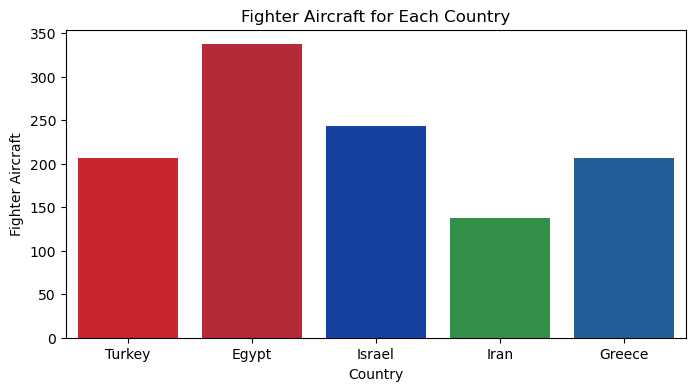

In [89]:
plt.figure(figsize=(8,4))
sns.barplot(data=airforce_df[airforce_df['Country'] != 'Russia'],x='Country',y='Fighter Aircraft',hue='Country',palette=country_colors,legend=False)
plt.title('Fighter Aircraft for Each Country')
plt.show()

<h2>Analysis</h2>
<h3>What are Fighter Aircrafts?</h3>
<h3>They are fast, agile warplanes capable of maneuvering smoothly. They are used in air combat to assert control over the skies during wars. They are considered the most important element of airforce.</h3>
<br>
<h3>Why they are important?</h3>
<h3>It is considered of great importance because it gives you control of the skies in wars, as a battle takes place between the state's aircraft and the enemy's in the sky, and whoever wins has won the greater part of the war.
The most prominent missions of this aircraft are:

- Destroying enemy aircraft and establishing control of the skies, which gives the state a significant advantage in wars.

- Defending the state and protecting it from any violent air attack.

- Securing the skies for attack aircraft and bombers to carry out their missions.

- Protecting private or government aircraft.

- It is not only important in the airspace, but also on the ground, as it can attack ground vehicles through bombing, and securing land for land operations. There is a military proverb that says, "Whoever controls the air, ground operations become safer and easier."</h3>
<h3>What we can get from this chart?</h3>
<h3>The clear superiority of Egypt and Israel, and the rapprochement between Türkiye and Greece.</h3>
<br>
<h2>Thoughts</h2>
<h3>Egypt and Israel's superiority comes from Western support, such as from the United States, Germany, and Russia.<br>
Turkey, on the other hand, relies on its own domestically produced aircraft, such as the 5th-generation TAI KAAN and HÜRJET, along with some Western aircraft such as the F-16 and EuroFighter Typhoon.
<br>While Turkey doesn't have much in the way of fighter jets compared to others, it is pursuing a self-sufficiency plan, manufacturing its aircraft locally. This will give it an advantage in the long term, as it will be able to increase its number of aircraft at a lower cost and with superior quality, given that they are locally manufactured.</h3>

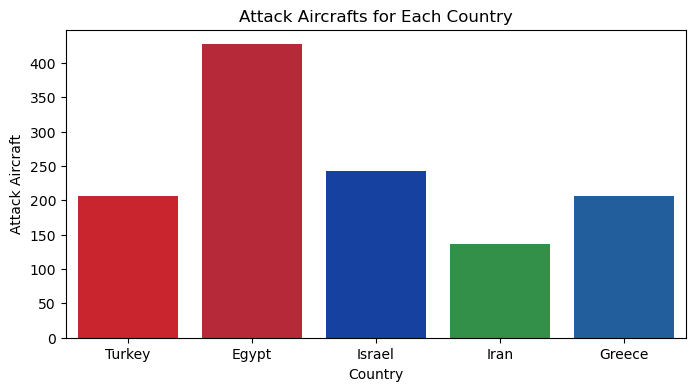

In [91]:
plt.figure(figsize=(8,4))
sns.barplot(data=airforce_df[airforce_df['Country'] != 'Russia'],x='Country',y='Attack Aircraft',hue='Country',palette=country_colors,legend=False)
plt.title('Attack Aircrafts for Each Country')
plt.show()

<h2>Analysis</h2>
<h3>What are Attack Aircrafts?</h3>
<h3>Heavily armored attack warplanes that are designed to strike ground and sea targets such as vehicles, command centers, and military bases. They cannot fight face-to-face with other aircraft.</h3>
<br>
<h3>What they are used for?</h3>
<h3>Assisting soldiers and ground forces in advancing by destroying ground combat vehicles and artillery.<br><br>

Used for tactical operations such as attacking military bases, watchtowers, and more.</h3>
<h3>What are the differences between Fighter and Attack aircrafts?</h3>
<h3>Fighter aircrafts are used for air-to-air combat, meaning they can fire and fight other aircrafts or aircrafts of the same type. They can also conduct ground attacks, but not as powerfully or effectively as attack aircraft.<br><br>

Attack aircraft are used for ground attacks only, meaning they cannot engage with other aircrafts in the air. They can only bomb those who are on the ground.</h3>
<h3>What we can get from this chart?</h3>
<h3>Once again, Egyptian and Israeli superiority, and rapprochement between Turkey and Greece.</h3>
<br>
<h2>Thoughts</h2>
<h3>Egypt has a large number of aircraft because they purchase a large number from Western countries, as does Israel.
But why doesn't Turkey have the same number? Due to the problems between the United States and Germany regarding Turkey, they refuse to sell warplanes to the country. Therefore, Turkey relies on building its own aircraft as part of its self-sufficiency plan. As we mentioned earlier, this has a positive effect in the long run, as it allows Turkey to acquire a large number of aircraft at a lower cost and of excellent quality.</h3>

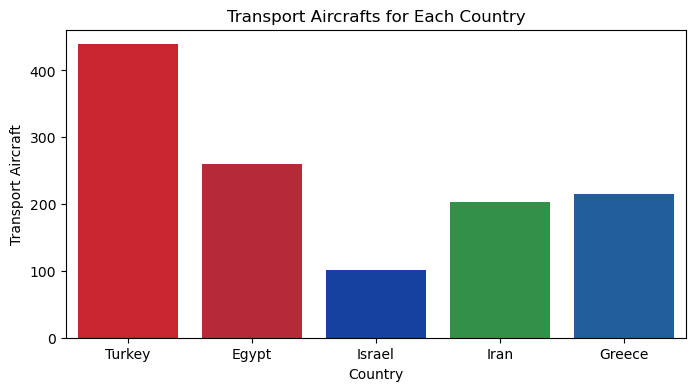

In [93]:
plt.figure(figsize=(8,4))
sns.barplot(data=airforce_df[airforce_df['Country'] != 'Russia'],x='Country',y='Transport Aircraft',hue='Country',palette=country_colors,legend=False)
plt.title('Transport Aircrafts for Each Country')
plt.show()

<h2>Analysis</h2>
<h3>What are Transport Aircrafts?</h3>
<h3>They are very large and heavy aircraft designed to transport soldiers, vehicles, equipment, resources, etc. They are not designed for combat, but they have a very great logistical benefit and are considered one of the most important vehicles for any army.</h3>
<br>
<h3>Why they are important?</h3>
<h3>Its armor and heavy weight provide it with special protection against attacks or dangers.<br>
It is extremely important because it enables the army to transport its armored vehicles, tanks, missiles, soldiers, equipment, resources, medical equipment, electronics, and much more in large quantities from one country to another or from one dangerous point to another.<br>
It is also used for tactical purposes, such as the immediate landing of soldiers behind enemy lines, or the airdropping of supplies to the army, among other tactical purposes.</h3>
<h3>What we can get from this chart?</h3>
<h3>We see Turkey's clear superiority over other countries, while Israel is in last place in this aircraft type</h3>
<br>
<h2>Thoughts</h2>
<h3>Turkey possesses a large number of these aircraft, and this is a good thing given their logistical and tactical importance in wars. We must not forget that Turkey has many soldiers and military vehicles, whether naval, ground, or even air. Yes, Turkey does not have a large number of warplanes like Egypt, Israel, and Russia, but it follows an excellent self-sufficiency plan and produces a large number of warplanes and even UAVs of world-class quality, which are of great importance in modern battles. Therefore, it is a good thing that Turkey possesses a large number of these types of warplanes.</h3>

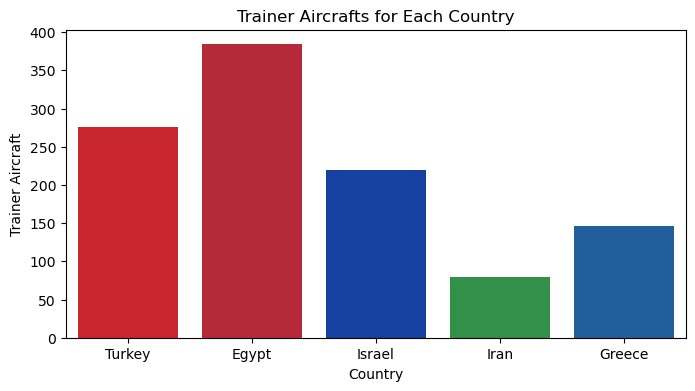

In [95]:
plt.figure(figsize=(8,4))
sns.barplot(data=airforce_df[airforce_df['Country'] != 'Russia'],x='Country',y='Trainer Aircraft',hue='Country',palette=country_colors,legend=False)
plt.title('Trainer Aircrafts for Each Country')
plt.show()

<h2>Analysis</h2>
<h3>What are Trainer Aircrafts?</h3>
<h3>It is an easy-to-use combat aircraft used for training and drilling soldiers beginning their careers in combat aviation. It lacks advanced missiles and weapons and cannot be used in major wars.</h3>
<br>
<h3>Can it be used in battles?</h3>
<h3>They can be used in wars against countries that lack medium- or high-level aircraft, or countries with weak defense systems. Therefore, they are not a substitute for fighter or attack aircraft.</h3>
<br>
<h3>What they are used for?</h3>
<h3>It is used to train new and novice pilots on the basics of aircraft control, takeoff and landing, maneuvering skills and their use in military plans, training on the use of weapons and missiles in aircraft, and how to survive if disasters or danger occur to the aircraft.</h3>
<br>
<h3>What we can get from this chart?</h3>
<h3>Egypt is far ahead of other countries, followed by Turkey and Israel.</h3>
<br>
<h2>Thoughts</h2>
<h3>We see Egypt's superiority and focus on training aircraft, which provides an answer to why the Egyptians are so adept at using fighter aircraft. We saw their prowess when they defeated Israel in the October 1973 War, despite their smaller and less quality aircrafts. 
<br>As for Turkey, it's good that it has also focused on this aspect, as it is important to train the new generation to use fighter aircraft, given their importance in modern battles.</h3>

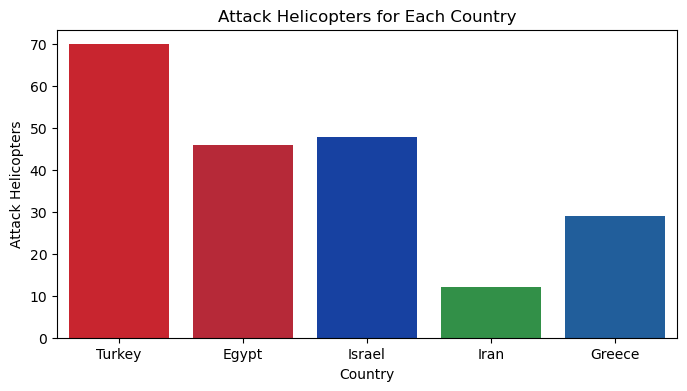

In [97]:
plt.figure(figsize=(8,4))
sns.barplot(data=airforce_df[airforce_df['Country'] != 'Russia'],x='Country',y='Attack Helicopters',hue='Country',palette=country_colors,legend=False)
plt.title('Attack Helicopters for Each Country')
plt.show()

<h2>Analysis</h2>
<h3>What are Attack Helicopters?</h3>
<h3>They are fixed-wing helicopters that can fly and fire bullets or missiles from a distance, without having to approach the target.
</h3>
<br>
<h3>What they are used for?</h3>
<h3>The idea of using helicopters as warplanes came from the Germans during WW2 when they wanted to attack the British Empire by air, but they did not want to enter the country for fear of being intercepted by the Royal Air Force (RAF). They decided to use them because they could fly, then remain stationary at a distance, and then fire or bomb. Still, there are more uses like:
    
- Assisting soldiers and ground or naval combat vehicles against enemies.

- Transporting important or commanding personnel.

- Pursuing enemy personnel during flight, or locating enemy locations from the air.

- Used in military planning to land soldiers behind enemy lines or in various locations on the battlefield.</h3>
<h3>What we can get from this chart?</h3>
<h3>Turkey has more helicopters than any other countries, with Egypt and Israel being close.</h3>
<br>
<h2>Thoughts</h2>
<h3>Turkey not only has the largest number, but also the highest quality. It produces its own helicopters, such as the ATAK, which is a model of excellent helicopter quality worldwide and is widely praised for its quality and features.<br>
Although the use of helicopters in modern warfare has declined due to the rise of UAVs, they are still being used in warfare. This is a remarkable feat, given Turkey's proven capabilities in both the number and quality of both helicopters and drones.</h3>

<h2>Lastly. Custom Airforce Strength Ranking Formula</h2>
<h3>Now it is time to do the power ranking according to the special formula.<br>
The formula used is:<br>
Airforce Score =<br>(Fighter Aircraft × 0.3) + (Attack Helicopter x 0.25) + (Attack Aircrft x 0.2) + (Transport Aircraft x 0.15) + (Trainer Aircraft x 0.1)<br><br>
    
This formula was designed to measure the airforce strength of nations and make comparisons easier. Why this formula?<br>
- Fighter Aircraft (30%): Because it is the backbone of air power, and due to its frequent use in the history of wars.<br>

- Attack Helicopters (25%): Due to its wide range of uses, whether defensive, offensive, tactical or logistical, and its ability to accomplish many different missions, it also has a long history of wars and has been used extensively.<br>

- Attack Aircraft (20%): It's not superior to a helicopter because it's only used for one mission: bombing.
Fighter aircraft can also perform this mission, though not at the same level of quality. However, it's still superior in terms of its importance, power, and ability to destroy the enemy.<br>

- Transport Aircraft (15%): It is not used for attack or defense, its function is transportation only, but it is important to military leaders and therefore it is not in the last rank.<br>

- Trainer Aircraft (10%): While they are still combat aircraft, they are not used in combat.
<br>They are designed to train and exercise soldiers. Even if they were used in combat, they are weak and poor-quality aircraft that can only fight against weak aircraft or defense systems.<br>
<br><br>

In [100]:
features = [ 'Fighter Aircraft', 'Attack Helicopters', 'Attack Aircraft', 'Transport Aircraft', 'Trainer Aircraft']
scalar = MinMaxScaler()
normalized = scalar.fit_transform(airforce_df[features])
weights = [0.3, 0.25, 0.2, 0.15, 0.1]
airforce_score = normalized @ weights
airforce_df['Airforce Score'] = [round(af_score * 100,2) for af_score in airforce_score]
airforce_df = airforce_df.sort_values(by='Airforce Score', ascending=False)
airforce_df['Rank (Airforce)'] = np.arange(1,7)
airforce_df.set_index('Rank (Airforce)',inplace=True)
airforce_df

,Country,Rank (Global),Total Aircraft Strength,Fighter Aircraft,Attack Aircraft,Transport Aircraft,Trainer Aircraft,Attack Helicopters,Airforce Score
Rank (Airforce),,,,,,,,,
1,Russia,2,4245,806,1438,1124,387,490,100.00
2,Egypt,10,1454,337,427,260,384,46,27.44
3,Turkey,8,1199,207,207,439,276,70,18.60
4,Israel,15,854,243,243,101,219,48,12.81
5,Greece,28,802,206,206,215,146,29,8.89
6,Iran,21,568,137,137,203,79,12,1.50


<h2>Analysis</h2>
<h3>Russia, as usual, is in first place without any competitor, and for this reason it is considered a great power and ranked second in the Global Power Index.<br><br>
Egypt, due to its large numbers, has returned to second place after having been ranked fourth in the naval force rankings, which confirms Egypt's air power.<br><br>
Turkey and Israel are close, with Turkey having the upper hand. While Israel has a superior number of fighter and attack aircraft, they have focused entirely on them and neglected other aircraft, leaving Turkey to excel in them.<br><br>
Israel's tactic in warfare is to strike hard first, then defend. We saw this in its wars against the Arabs in 1967, its war against Egypt in 1973, its war against Lebanon in 2006, and, as we see now, its war against Palestine. Therefore, it relies entirely on these two types of aircraft.</h3>
<br>
<h2>Thoughts</h2>
<h3>Air power is the most important force in modern warfare. Its importance extends from WW2 to the present day, why is it so important?<br><br>
We have witnessed the importance of these aircraft and the importance of controlling the skies in several recent battles, such as:<br>
- Battle of Eagle Day, 1940, United Kingdom vs Germany<br>
- Battle of Schweinfurt-Regensburg, 1940, USA & UK vs Germany<br>
- Battle of Kursk, 1943, Soviet Union vs Germany<br>
- The Korean War, 1950-1953, USA vs North Korea & China<br>
- The Six Days Battle, 1967, Israel vs Arab<br>
- Battle of Mansourah, 1973, Israel vs Egypt<br>
- The Gulf Battle, 1991, USA vs Iraq<br>
- Battle of Temmuz (July), 2006, Israel vs Lebanon<br>
- Battle of Russia and Ukraine, 2022, Russia vs Ukraine<br>
- Battle of Kishmir, 2025, India vs Pakistan<br>
And much much more from the battles of WW2 until now.</h3>
<br>
<h3>Is it everything nowadays?<br><br>
It is the most important, but it is not everything. There are still ground and naval forces, and they are two important elements in warfare.<br><br>

Currently, air forces no longer rely solely on aircraft. We have entered the world of combat with drones, as they operate like aircraft and carry out aircraft missions with fewer material and human losses. This makes countries currently rely on them instead of using aircraft, as we see in the war between Russia and Ukraine.<br><br>

Due to Turkey's greatness and intelligence in analyzing modern warfare, it has developed domestically and very high-quality drones that compete with the most powerful countries in the world, such as the United States, Russia, and China. We see this with the BAYRAKTAR TB2/TB3 drones, which are among the most powerful drones in the world and the most widely used by countries, as they are of excellent quality and at a lower cost. This is why they are the most widely used drones in the world.<br><br>

We are currently witnessing Turkey's increasing rise in the drone industry, focusing on drones such as the Bayraktar Kızılelma and Aksungur, along with the domestic production of combat aircraft such as the KAAN and HÜRJET, which are considered of exceptional quality globally. We should not forget helicopters such as the ATAK, which are among the most powerful helicopters in the world. Therefore, Turkey is currently one of the strongest countries in developing domestic military aircraft and may compete with major powers in the air force in the future.</h3>

<h2>Chapter 5: Final Scores 🌟</h2>

<h2>Last but not Least: Scores Analysis</h2>
<h3>Let's evaluate and analyze the final results between Turkey and the rest of the countries for each force. We'll discuss where Turkey excelled and where it didn't, and my thoughts on the situation.</h3>

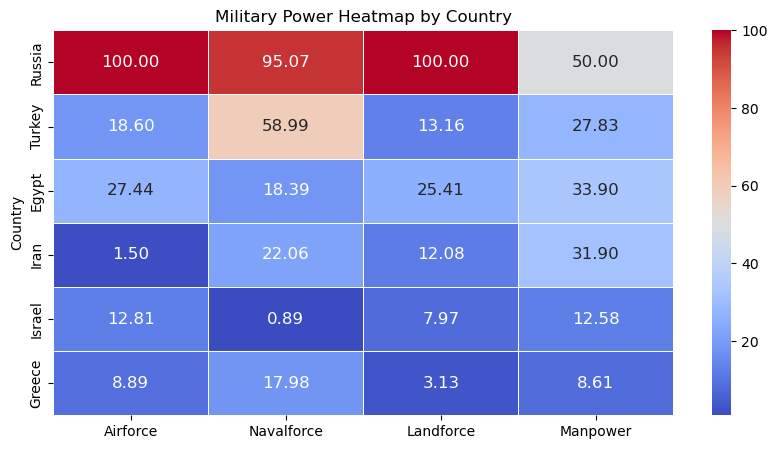

In [104]:
conct_df = pd.DataFrame({
    "Country": ["Russia", "Turkey", "Egypt", "Iran", "Israel", "Greece"],
    "Airforce": [100, 18.60, 27.44, 1.50, 12.81, 8.89],
    "Navalforce": [95.07, 58.99, 18.39, 22.06, 0.89, 17.98],
    "Landforce": [100, 13.16, 25.41, 12.08, 7.97, 3.13],
    "Manpower": [50, 27.83, 33.90, 31.90, 12.58, 8.61]
})

conct_df.set_index("Country", inplace=True)
plt.figure(figsize=(10, 5))
sns.heatmap(conct_df, annot=True, linewidths=0.5,cmap='coolwarm', annot_kws={"size": 12}, fmt=".2f")
plt.title("Military Power Heatmap by Country")
plt.show()

<h2>Analysis</h2>
<h3>Airforce: 🚀</h3>
<h3>Turkey ranks third, approximately 10 points behind second-place Egypt.<br>
We saw Egypt's superiority since it has more airforce equipment, but as we analyzed and researched, we found that Turkey possesses quality and local manufacturing. We also looked at Turkey's plan to increase its aircraft fleet, particularly the 5th-generation KAAN aircraft, the Kızılelma unmanned combat aircraft, which is one of the first unmanned combat aircraft, and the Atak helicopters, which boast world-class quality.
<br>This, to me, is what distinguishes Turkey from others, as it produces its aircraft domestically and with a quality that rivals the world's most powerful countries.<br>
Therefore, in the future, Turkey will have a greater number of aircraft, especially since it will have more high-quality aircraft at a lower production cost than purchasing aircraft from foreign countries like Egypt and Israel.</h3>
<br>
<h3>Navalforce: 🚢</h3>
<h3>Turkey clearly and significantly outperforms all other countries (except Russia), demonstrating its naval strength. 
<br>This is a very positive development, especially since Turkey needs a naval force, given its waterfront location and rich history of naval battles, which is one of the reasons for its historical greatness. 
<br>Turkey not only has the numbers, but also the quality, which makes Turkish ships among the best in the world, particularly frigates. Let's not forget that Turkey is the only country in the world attempting to produce an aircraft carrier specifically for drones. This makes neighboring countries fear Turkey at sea.</h3>
<br>
<h3>Landforce: 🚛</h3>
<h3>Turkey is in third place, competing with Iran, with the difference between them being one point in Turkey's favor.<br>
The reason for Iran's close proximity is that it relies heavily on long-range and intercontinental missiles in its wars, and therefore possesses a large number of rocket launchers. However, as research results and Iran's most recent wars (the night of its bombing of Israel) have shown us, the quality and accuracy of its rocket launchers are not excellent. They rely on quantity and heavy bombardment, and thus their missiles were able to bypass Israeli defenses, but they did not cause significant damage to any of Israel's military or important centers.<br>
Egypt also has an advantage over Turkey because it possesses a large number of vehicles, but it contains many old Soviet-era vehicles and vehicles from other countries, such as the United States and Germany.<br>
We were also able to learn about Turkey's upcoming plans to build a large number of tanks, such as the Altay MBT, locally manufactured with excellent quality and modern technology. This also gives Turkey an advantage in the long term, as it will enable it to acquire a large number of high-quality tanks at a lower cost.</h3>
<br>
<h3>Manpower: 🪖</h3>
<h3>Here we see Russia, Egypt, and Iran outperforming Turkey. However, Egypt's and Iran's superiority is slight, at 5 and 3 points.<br>
Their superiority was due to the large number of their soldiers. However, as we know and have observed from recent wars, such as Russia's war against Ukraine and India's war against Pakistan, modern wars do not depend on the number of soldiers.<br>
If we look at other forces, we notice the superiority of the Turks over others. This is due to the intelligence and great effort the Turks exert in developing their country, maintaining its progress, and making it a strong state.<br>
The beauty of Turkey is that its people are always ready to protect the homeland, and this is what makes this country strong—its great people!<br>
But our goal is not just to make Turkey a strong country, but to make it a great power and a country feared by all, and to return it to its natural place, which is the throne of the most powerful and developed countries in the world.
<br>To achieve this, the people, especially the older and more experienced generation, must educate the new generation, and the new generation must study, learn, and work diligently and intelligently to develop this country.</h3>

<h2>Conclusion 🔚</h2>
<h3>In the end, we saw Russia's great superiority over all other countries, and for this reason it is considered a great power and the second most powerful country in the world after the United States, according to the Global Power Index.
<br>Turkey also ranks 8th, due to the strength of its equipment, vehicles, and soldiers, and most importantly, the high, global, and excellent quality that Turkey possesses in all its forces.
<br>Also, because the Turkish people are a great people and always work hard to develop Turkey. God willing, we will see Turkey in the future sitting atop the Global Power Index and a country feared by all countries, just as it was in the past. This is due to its people and its new generation who study and work hard. Let's not forget the government's provision of everything students need, from education to healthcare and attention.
<br>Truly, what a great country with a great nation!</h3>
<br>
<h2>Notes 📝</h2>
<h3>These are important notes to point out, please take them into consideration.<br>
    
- This project is intended solely for learning and practicing data science, and I do not intend to offend any country mentioned.

- All the information obtained by searching the internet, watching numerous YouTube videos, and taking information from ChatGPT and DeepSeek.

- This data is taken from Kaggle, and it is data from 2017. Therefore, these numbers and data are considered outdated and not currently accurate. However, as I mentioned, the goal of this project is to learn and practice data science.

Thank you for your understanding 🙏🏻.</h3>